# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.
2. Predecir el volúmen de precipitaciones (columna *Rainfall* del dia siguiente), en función al *Rainfall* del dia actual


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor
- ancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Para cada uno de los problemas propuestos, defina una lista de modelos candidatos a entrenar. Justifique sus elecciones. 

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
pd.set_option("display.max_columns", None)

# sklearn
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
# Partición de train-test set
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


### 1. Análisis exploratorio inicial

In [2]:
weather_aus_df = pd.read_csv('data/weatherAUS.csv', parse_dates=['Date'])
weather_aus_df.shape

(145460, 23)

In [3]:
weather_aus_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
weather_aus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [5]:
weather_aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


This dataset contains about 10 years of daily weather observations from many locations across Australia.

Date: The date of observation
Location: The common name of the location of the weather station
RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
WindDir3pm: Direction of the wind at 3pm
WindDir9am: Direction of the wind at 9am
WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight

MinTemp: The minimum temperature in degrees celsius
MaxTemp: The maximum temperature in degrees celsius
Rainfall: The amount of rainfall recorded for the day in mm
Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine: The number of hours of bright sunshine in the day.
WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3am
Humidity9am: Humidity (percent) at 9am
Humidity3pm: Humidity (percent) at 3pm
Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast
Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am: Temperature (degrees C) at 9am
Temp3pm: Temperature (degrees C) at 3pm

RainTomorrow: The target variable. Did it rain tomorrow? (1 = yes, 0 = no )


#### Variables numéricas

In [6]:
print('Columnas con variables numéricas')
numeric_df = weather_aus_df.select_dtypes(exclude=['category', object]).columns
numeric_df.values


Columnas con variables numéricas


array(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

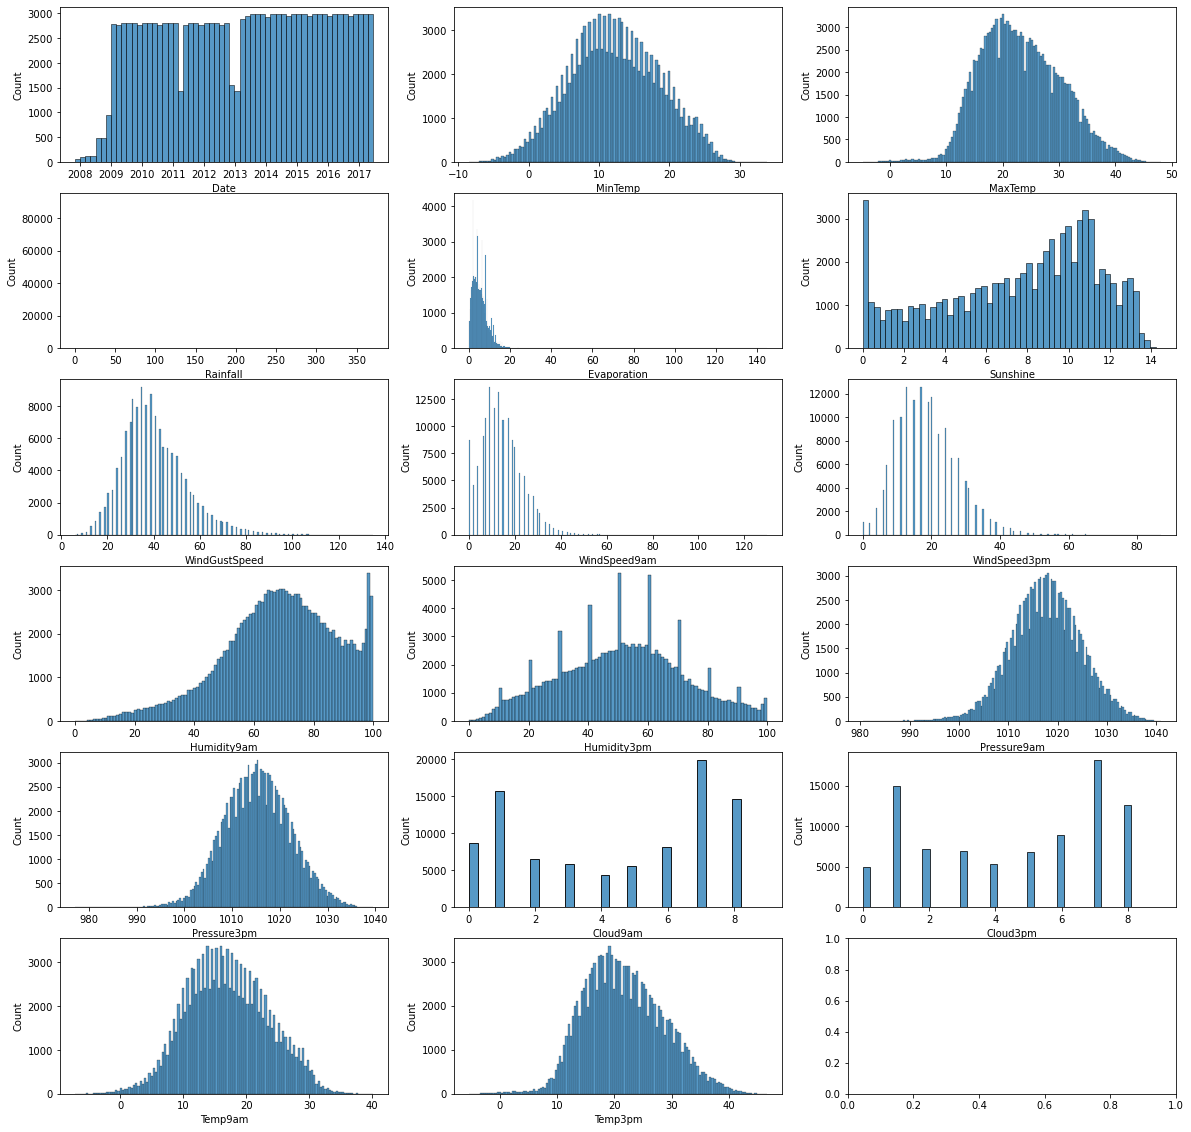

In [7]:
def distributionPlots(df, numeric_columns):
    fig, axes =plt.subplots(6,3, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            sns.histplot(data = df, x = numeric_columns[i], ax=ax)
            i+=1

distributionPlots(weather_aus_df, numeric_df.values)

* Date es una variables compuesta (year-month-day), proponemos descomponerlo.
* Temp9m, Temp3pm, MinTemp, MaxTemp se asemejan a una normal
* WindGustSpeed, WindSpeed9am y WindSpeed3pm son v.a continuas pero no tiene suficientes muestras para completar su distribución.
* Rainfall, Evaporation y sunshine tienen otra forma de distribución diferente a una normal o no tienen suficientes muestras.
* Humidity9am y Humidity3pm tienen oblicuidad.
* Pressure9am y Pressure3pm también se asemejan a una distribución normal.
* Cloud3pm y Cloud9am son v.a discretas medidas en ‘Octa’, https://es.wikipedia.org/wiki/Octa

#### Variables categóricas

In [8]:
print('Columnas con variables categóricas')
categorical_df = weather_aus_df.select_dtypes(include=['category', object]).columns
categorical_df.values

Columnas con variables categóricas


array(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

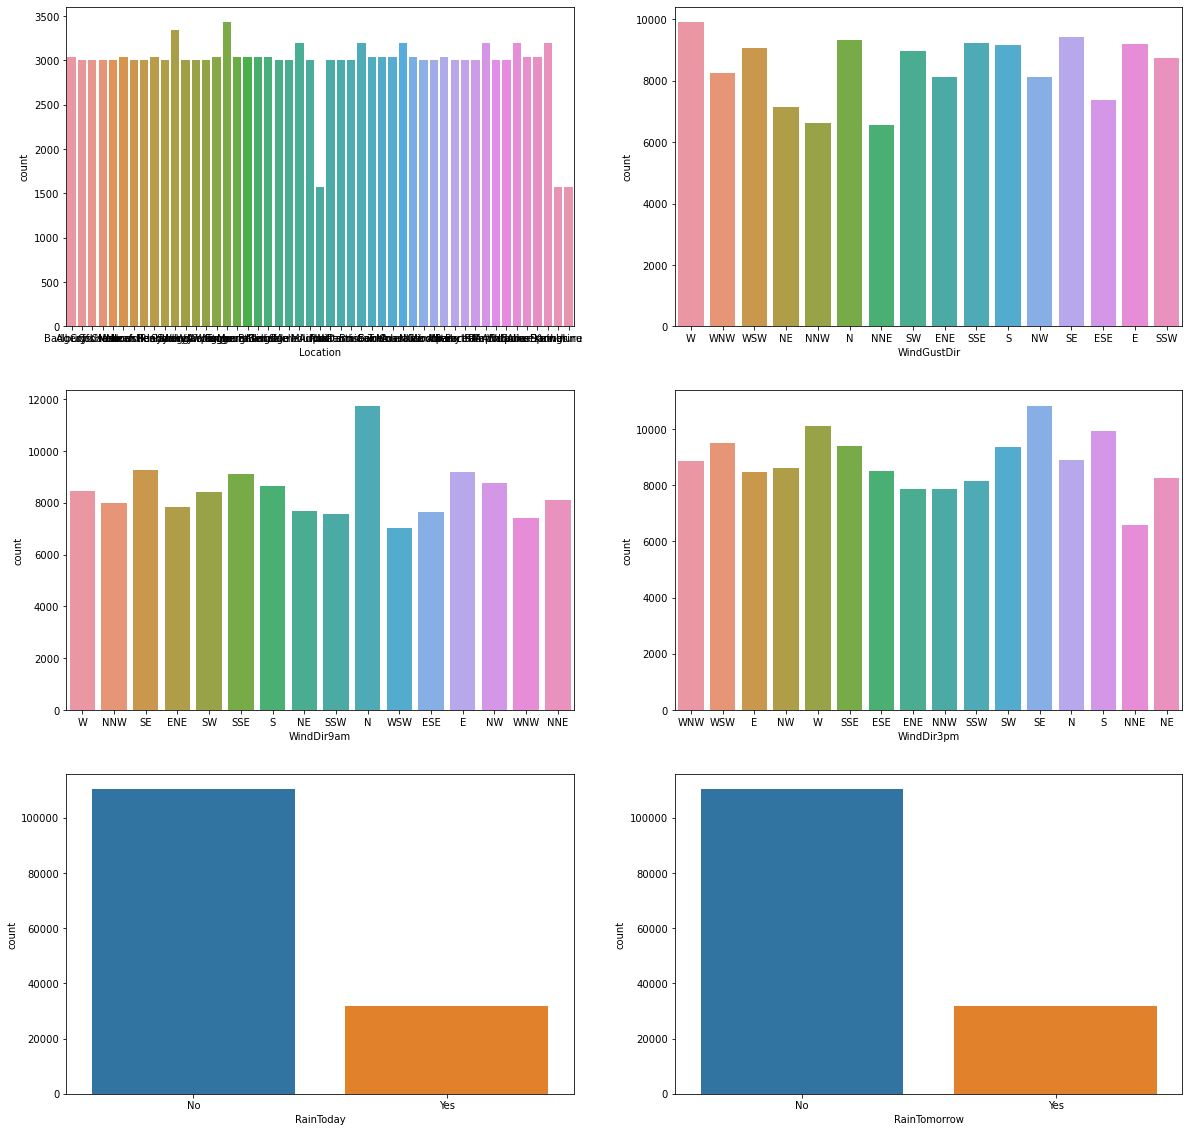

In [9]:
def countPlots(df, column_names):
    fig, axes =plt.subplots(3,2, figsize=(20,20))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(column_names):
            sns.countplot(x = column_names[i],
                   data = df, ax=ax)
            i+=1

countPlots(weather_aus_df, categorical_df.values)

* Location,  WindGustDir, WinDir9am y WinDir3pm está bastante bien balanceadas.
* WindGustDir, WinDir9am y WinDir3pm tienen las mismas unidades/labels
* RainToday y RainTomorrow solo tienen 2 etiquetas ('Yes' o 'No')

#### Valores unicos/cardinalidad

In [10]:
for i in categorical_df.values:
    print(i, weather_aus_df[i].unique(), len(weather_aus_df[i].unique()))

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 49
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 17
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 17
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE'] 17
RainToday ['No' 'Yes' nan] 3
RainTomorrow ['No' 'Yes' nan] 3


* La variable 'Location' posee mayor cardinalidad (49), vamos a proponer Label encoding o dummy encoding (genera mas dimensiones)
* Las variables 'WindGustDir', 'WindDir9am' y 'WindDir3pm' se puede usar una transformacion de sin y cosine o Label encoding
* Las variables RainToday y RainTomorrow se encuentran desbalanceadas, existen más muestras de cuando no llueve. Usaremos dummy encoding.

#### Variable de salida

In [11]:
weather_aus_df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

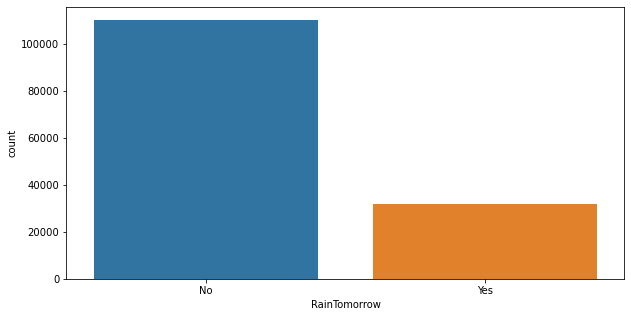

In [12]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
                   data = weather_aus_df, ax=axes)

¿Qué técnicas consideraría para codificar la variable de salida?
Como trabajaremos con una clasificación binaria entonces la forma de codificar la variable de salida es simple, usamos 1 para Yes y 0 para No (dummy encoding).

¿Están balanceadas las clases?
Las clases de la variable de salida están desbalanceadas, buscaremos que la proporcion se mantenga en Train,Validation y Test

### 2. Esquema de validación de resultados
tomamos un 20% de los datos para test.

In [13]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(weather_aus_df.drop(columns=['RainTomorrow']), weather_aus_df['RainTomorrow'], test_size=test_ratio)
print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (116368, 22) (116368,)
Test: (29092, 22) (29092,)


#### Revisar que las distribuciones en train y test que sean parecidas

In [14]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,115194.000000,115381.000000,113788.000000,66077.000000,60441.000000,108151.000000,114959.000000,113907.000000,114230.000000,112701.000000,104343.000000,104373.000000,71725.000000,68909.000000,114958.000000,113443.000000
mean,12.192740,23.233510,2.360821,5.472720,7.617209,40.035534,14.031568,18.649161,68.855607,51.500439,1017.639892,1015.240415,4.437532,4.507800,16.995452,21.692488
std,6.406675,7.127599,8.441408,4.194251,3.786042,13.616071,8.913658,8.806616,19.012374,20.786650,7.098641,7.026381,2.887662,2.722763,6.496730,6.940559
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,367.600000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.700000


In [15]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,28781.000000,28818.000000,28411.000000,16593.000000,15184.000000,27046.000000,28734.000000,28491.000000,28576.000000,28252.000000,26052.000000,26059.000000,17847.000000,17193.000000,28735.000000,28408.000000
mean,12.199215,23.172656,2.361307,5.450359,7.587171,40.034016,14.090868,18.716612,68.981663,51.693402,1017.690181,1015.317867,4.487365,4.518467,16.971345,21.647061
std,6.365758,7.084625,8.623444,4.191604,3.783287,13.571231,8.922240,8.822468,19.096136,20.832420,7.138034,7.081229,2.884870,2.710758,6.456818,6.921024
min,-8.000000,-3.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.300000,980.200000,0.000000,0.000000,-7.000000,-4.200000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.200000,16.600000
50%,12.000000,22.600000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.500000,1020.200000,7.000000,7.000000,21.500000,26.300000
max,31.400000,46.800000,371.000000,81.200000,14.100000,117.000000,74.000000,76.000000,100.000000,100.000000,1040.600000,1037.800000,9.000000,8.000000,40.200000,45.300000


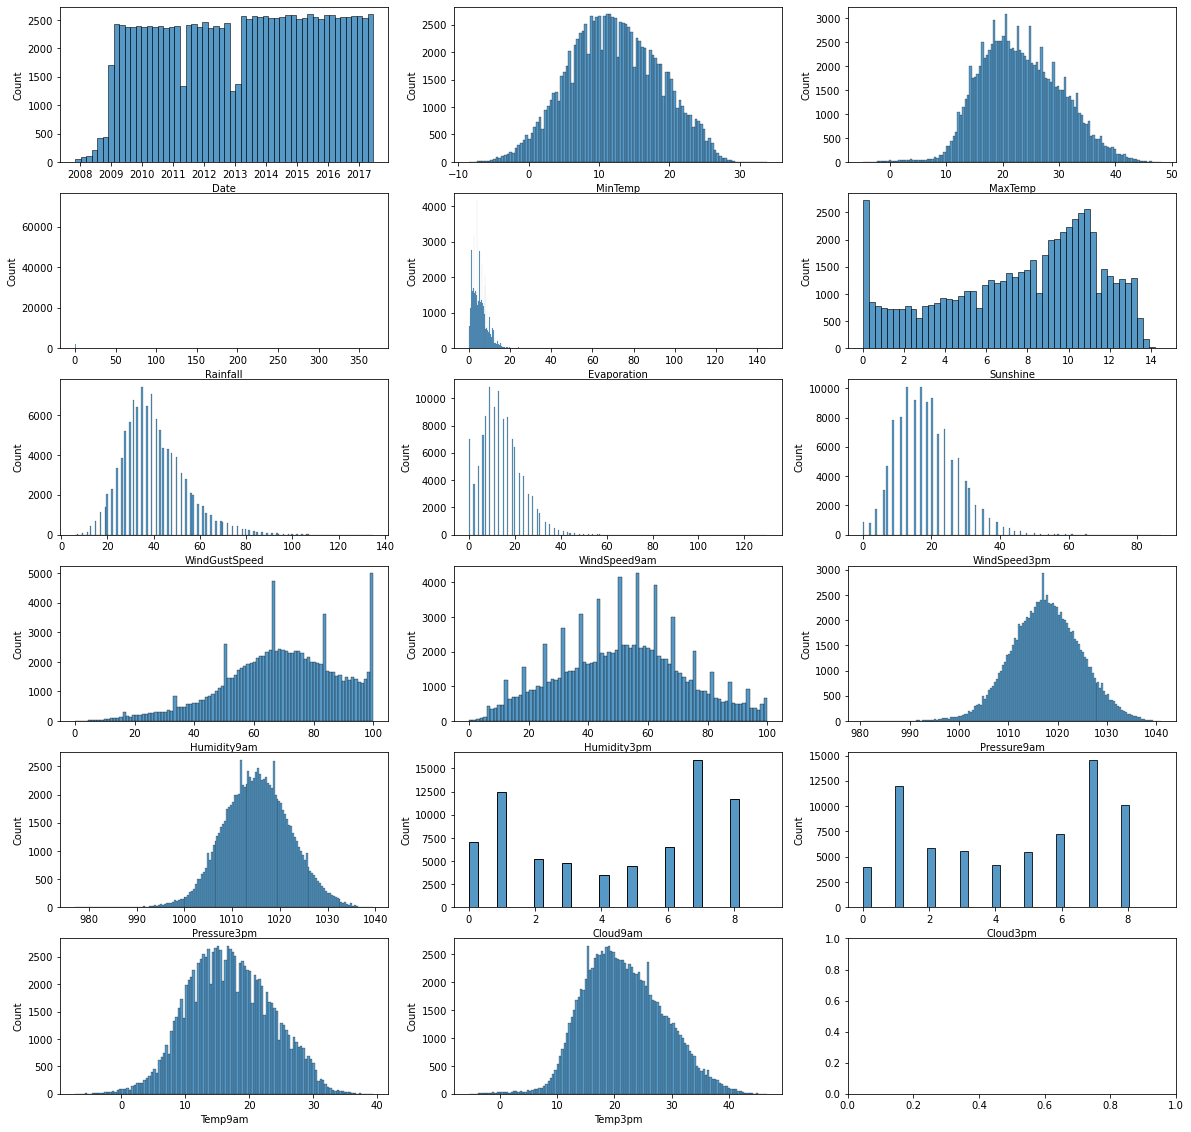

In [16]:
distributionPlots(X_train, X_train.select_dtypes(exclude=['category', object]).columns.values)

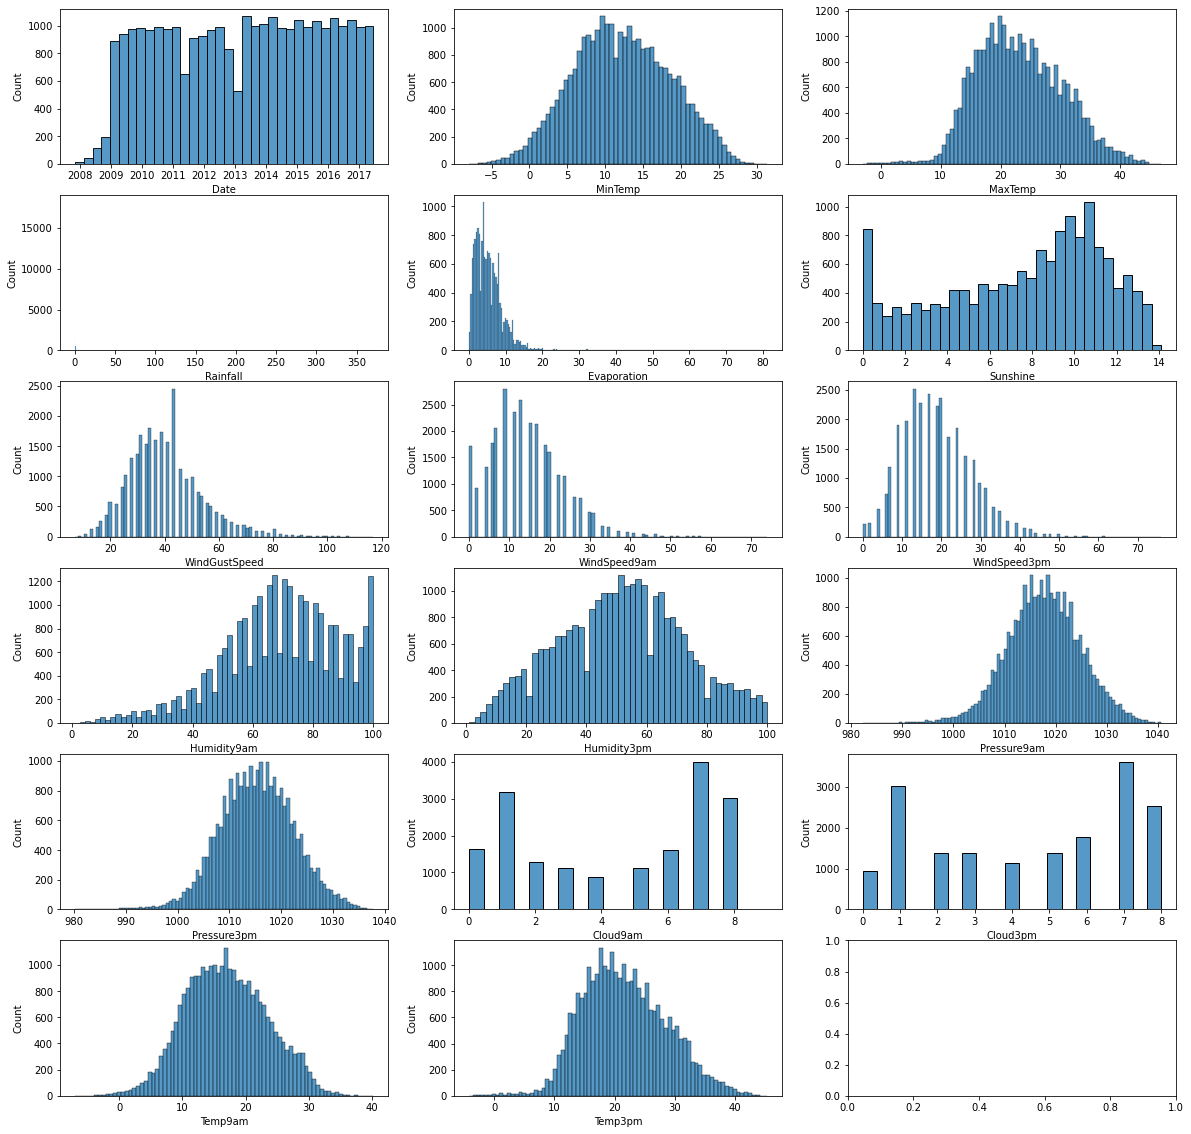

In [17]:
distributionPlots(X_test, X_test.select_dtypes(exclude=['category', object]).columns.values)


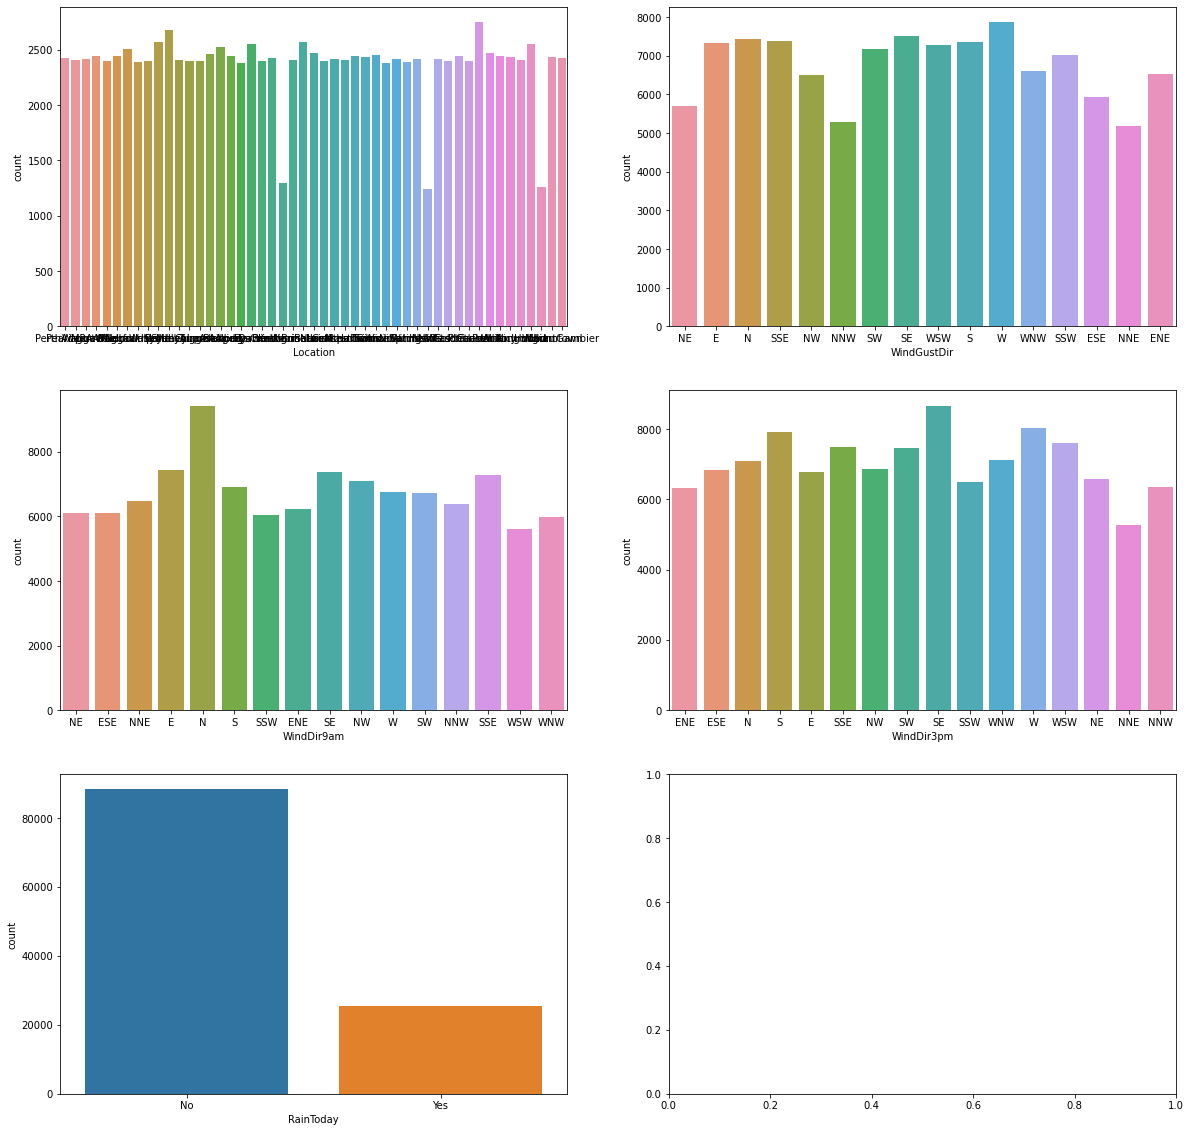

In [18]:
countPlots(X_train, X_train.select_dtypes(include=['category', object]).columns.values)

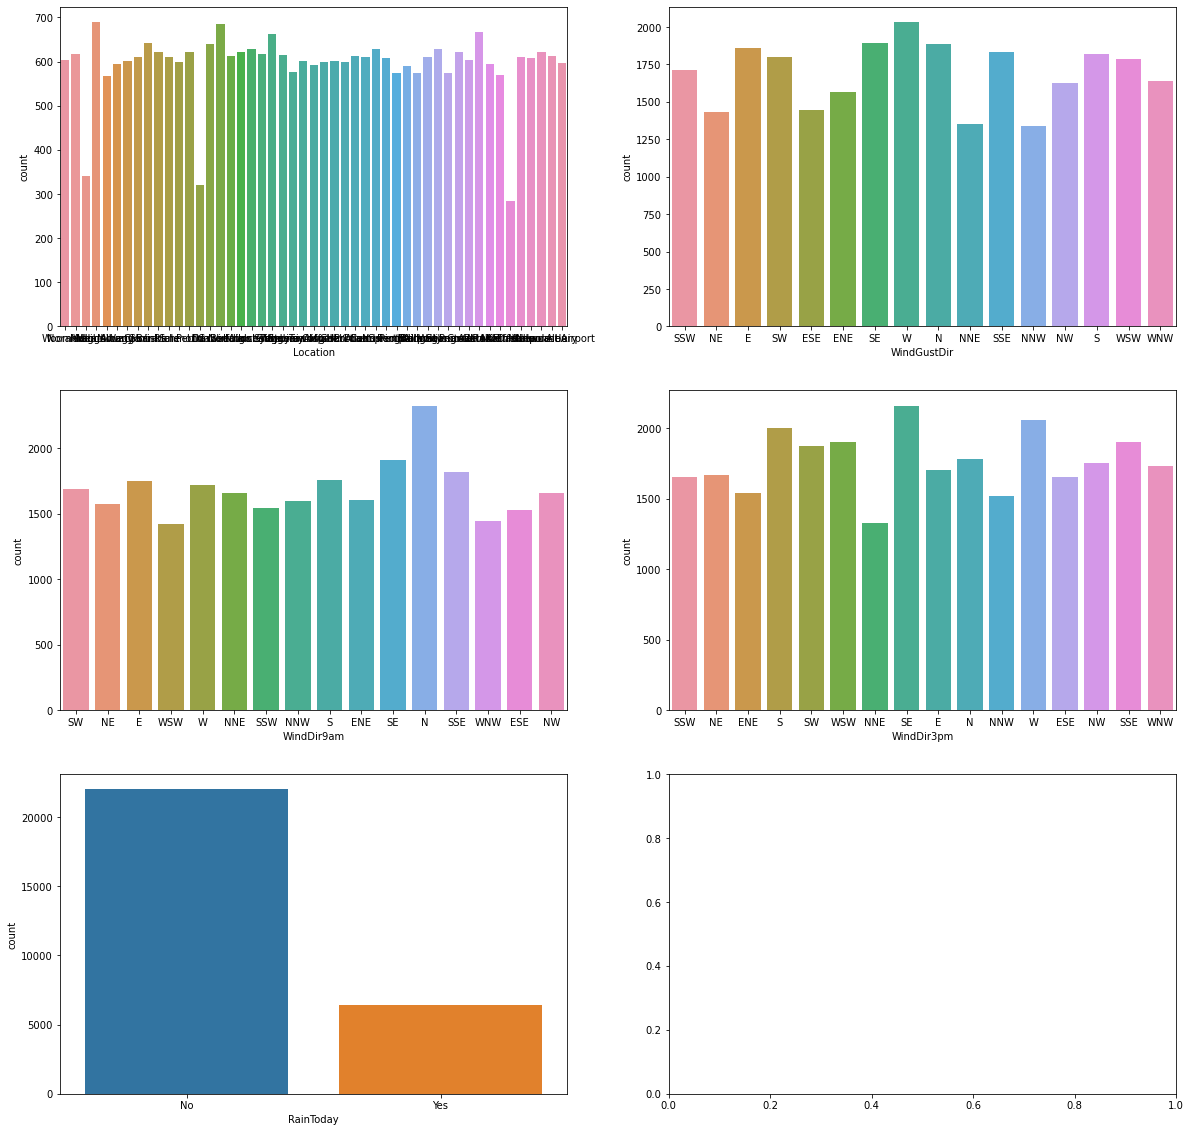

In [19]:
countPlots(X_test, X_test.select_dtypes(include=['category', object]).columns.values)

* Las distribuciones se asemejan en train y test

In [20]:
for column in weather_aus_df.select_dtypes(include=['category', object]).columns.values:
    if column != 'RainTomorrow':
        print('categórica {}, labels in train:{}, labels in test:{}'.format(column, len(X_train.dropna()[column].unique()), len(X_test.dropna()[column].unique())))

categórica Location, labels in train:26, labels in test:26
categórica WindGustDir, labels in train:16, labels in test:16
categórica WindDir9am, labels in train:16, labels in test:16
categórica WindDir3pm, labels in train:16, labels in test:16
categórica RainToday, labels in train:2, labels in test:2


* No hay ninguna etiqueta que aparezca en train y no en test y viceversa.

#### Revisar distribución de variable de salida


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

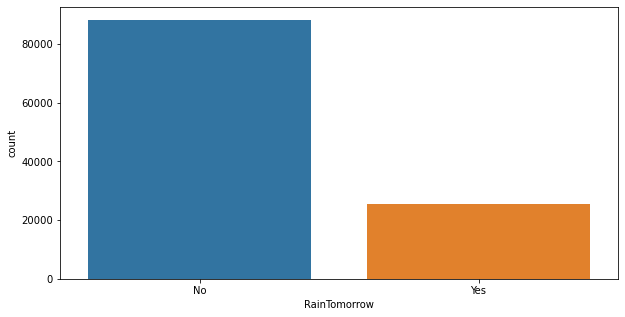

In [21]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_train.to_frame(), ax=axes)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

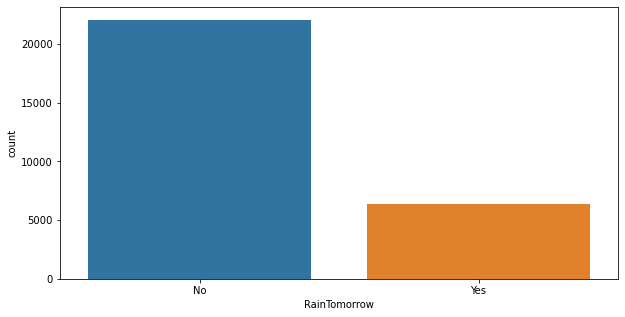

In [22]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x ='RainTomorrow' ,
              data = y_test.to_frame(), ax=axes)

* Tenemos la misma distribución de la variable de salida en train y test

#### Porcentaje Valores faltantes en Train y Test

In [23]:
count_nulls = pd.concat([X_train, y_train], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_train) * 100

Sunshine         48.060463
Evaporation      43.217207
Cloud3pm         40.783549
Cloud9am         38.363639
Pressure9am      10.333597
Pressure3pm      10.307817
WindDir9am        7.281211
WindGustDir       7.105046
WindGustSpeed     7.061220
Humidity3pm       3.151210
WindDir3pm        2.919187
Temp3pm           2.513578
RainTomorrow      2.242885
Rainfall          2.217104
RainToday         2.217104
WindSpeed3pm      2.114843
Humidity9am       1.837275
Temp9am           1.211673
WindSpeed9am      1.210814
MinTemp           1.008868
MaxTemp           0.848171
Location          0.000000
Date              0.000000
dtype: float64

Similares cantidades de valores faltantes en train y test

In [24]:
count_nulls = pd.concat([X_test, y_test], axis=1).isnull().sum().sort_values(ascending=False)
count_nulls/len(X_test) * 100

Sunshine         47.806957
Evaporation      42.963701
Cloud3pm         40.901279
Cloud9am         38.653238
Pressure9am      10.449608
Pressure3pm      10.425547
WindDir9am        7.194418
WindGustDir       7.074110
WindGustSpeed     7.032861
Humidity3pm       2.887392
WindDir3pm        2.856455
Temp3pm           2.351162
Rainfall          2.340850
RainToday         2.340850
RainTomorrow      2.258353
WindSpeed3pm      2.065860
Humidity9am       1.773683
WindSpeed9am      1.230579
Temp9am           1.227141
MinTemp           1.069022
MaxTemp           0.941840
Location          0.000000
Date              0.000000
dtype: float64

En general las distribuciones de las variables numéricas y categóricas se mantienen en train y test, la variable de salida tambien mantiene similar distribución

### 3. Limpieza y preparación de datos / ingeniería de features

#### Imputación de Valores faltantes

In [25]:
train_df = pd.concat([X_train, y_train], axis=1)

count_nulls = train_df.isnull().sum().sort_values(ascending=False)
print("# columnas con datos faltantes: ", len(count_nulls[count_nulls > 0]))
print('Porcentaje de datos faltantes x Columna: ')
count_nulls/len(train_df) * 100

# columnas con datos faltantes:  21
Porcentaje de datos faltantes x Columna: 


Sunshine         48.060463
Evaporation      43.217207
Cloud3pm         40.783549
Cloud9am         38.363639
Pressure9am      10.333597
Pressure3pm      10.307817
WindDir9am        7.281211
WindGustDir       7.105046
WindGustSpeed     7.061220
Humidity3pm       3.151210
WindDir3pm        2.919187
Temp3pm           2.513578
RainTomorrow      2.242885
Rainfall          2.217104
RainToday         2.217104
WindSpeed3pm      2.114843
Humidity9am       1.837275
Temp9am           1.211673
WindSpeed9am      1.210814
MinTemp           1.008868
MaxTemp           0.848171
Location          0.000000
Date              0.000000
dtype: float64

In [26]:
df1 = train_df[train_df.isnull().any(axis=1)]
print("filas con al menos 1 NaN (%) ", len(df1)/len(train_df) * 100)

filas con al menos 1 NaN (%)  61.24106283514368


* Alrededor del 61% de las filas cuentan con al menos 1 dato faltante, no podemos simplemente eliminarlas, analizamos la imputación de variables para cada columna.


#### Imputación de 'Sunshine'
Posee muchos valores faltantes (48%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de 'Evaporation'
Posee muchos valores faltantes (43%). Se elimina la columna porque imputarlo alteraría mucho su distribución.

#### Imputación de Cloud3pm y Cloud9am
Eliminar columnas Cloud3pm y Cloud9am, 40% y 38% de datos faltantes. Se elimina la columna porque imputarlo alteraría mucho su distribución.

In [27]:
train_df = train_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

#### Imputación de Rainfall, RainToday y RainTomorrow

In [28]:
# nulos en 'Rainfall' y 'RainToday' en la misma fila
print(train_df['Rainfall'].isnull().sum(), len(train_df[train_df['Rainfall'].isnull() & train_df['RainToday'].isnull()]))

2580 2580


* Como Rainfall está relacionado con RainToday, podemos ver que ambos tienen nulos al mismo tiempo. Como la cantidad de nulos es 2.24% podemos simplemente eliminar las filas con datos faltantes.

In [29]:
train_df = train_df.dropna(subset=['Rainfall', 'RainToday'])

También eliminamos los nulos de 'RainTomorrow' porque son menor al 5%

In [30]:
train_df = train_df.dropna(subset=['RainTomorrow'])

#### Remover filas con nulos menor al 5%

In [31]:
train_df = train_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

#### Imputación de WindGustDir y WindDir9am (categóricas)
Imputación por categoría más frecuente

In [38]:
moda_WindGustDir = train_df['WindGustDir'].value_counts().index[0]
moda_WindDir9am = train_df['WindDir9am'].value_counts().index[0]
print('WindDir modas: ', moda_WindGustDir, moda_WindDir9am)

WindDir modas:  W N


In [34]:
train_df['WindGustDir'] = train_df['WindGustDir'].fillna(moda_WindGustDir)
train_df['WindDir9am'] = train_df['WindDir9am'].fillna(moda_WindDir9am)

#### Imputación de WindGustSpeed
Imputación por la mediana

In [37]:
median_WindGustSpeed = train_df['WindGustSpeed'].median()
print('WindGustSpeed mediana: ', median_WindGustSpeed)

WindGustSpeed mediana:  39.0


In [36]:
train_df['WindGustSpeed'] = train_df['WindGustSpeed'].fillna(median_WindGustSpeed)

#### Imputación de Pressure3pm y Pressure9am
presentan alrededor del 10% de nulos
Imputación por KNN o imputacion por mediana

In [39]:
median_Pressure9am = train_df['Pressure9am'].median()
print('Pressure9am mediana: ', median_Pressure9am)

median_Pressure3pm = train_df['Pressure3pm'].median()
print('Pressure3pm mediana: ', median_Pressure3pm)

Pressure9am mediana:  1017.6
Pressure3pm mediana:  1015.2


In [40]:
train_df['Pressure9am_median'] = train_df['Pressure9am'].fillna(median_Pressure9am)
train_df['Pressure3pm_median'] = train_df['Pressure3pm'].fillna(median_Pressure3pm)

In [41]:

knn_df = train_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
imputer = KNNImputer(n_neighbors=3)
X_train_knn_imp = imputer.fit_transform(knn_df)

In [42]:
train_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
train_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

#### Codificación de variables categóricas

### Date
Para esta variable compuesta, hacemos la descomposición en año, mes y día

In [43]:
train_df.loc[:,'Date_day'] = train_df['Date'].apply(lambda  x: x.day)
train_df.loc[:,'Date_month'] = train_df['Date'].apply(lambda  x: x.month)
train_df.loc[:,'Date_year'] = train_df['Date'].apply(lambda  x: x.year)

* Podríamos pensar que el mes tiene más relacion con la variable objetivo.

### Location
Hacemos label encoding porque genera solo 1 columna, si aplicáramos dummy encoding generaría 48 columnas


In [44]:
location_le = LabelEncoder()
location_le.fit(train_df['Location'])
len(list(location_le.classes_))

49

In [45]:
train_df.loc[:, 'Location_le'] = location_le.transform(train_df['Location'])

### WindGustDir, WindDir3pm y WindDir9am
Hacemos una transformación por sin y cos o label encoding

In [46]:
# traduccion a grados sexagesimales
windDir_grados = {'E': 0, 'ENE': 22.5, 'NE': 45, 'NNE': 67.5, 'N':90, 'NNW': 112.5, 'NW': 135, 'WNW': 157.5, 'W': 180,
                  'WSW':202.5, 'SW': 225, 'SSW':247.5, 'S':270, 'SSE':292.5, 'SE':315, 'ESE': 337.5}

In [47]:
def sin_wind_dir(wind):
    return np.sin(windDir_grados[wind]*np.pi/180)
def cos_wind_dir(wind):
    return np.cos(windDir_grados[wind]*np.pi/180)

train_df['WindGustDir_sin'] = train_df['WindGustDir'].apply(sin_wind_dir)
train_df['WindGustDir_cos'] = train_df['WindGustDir'].apply(cos_wind_dir)
train_df['WindDir3pm_sin'] = train_df['WindDir3pm'].apply(sin_wind_dir)
train_df['WindDir3pm_cos'] = train_df['WindDir3pm'].apply(cos_wind_dir)
train_df['WindDir9am_sin'] = train_df['WindDir9am'].apply(sin_wind_dir)
train_df['WindDir9am_cos'] = train_df['WindDir9am'].apply(cos_wind_dir)

In [48]:
windDir_le = LabelEncoder()
windDir_le.fit(train_df['WindGustDir'])
len(list(windDir_le.classes_))

16

In [49]:
train_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(train_df['WindGustDir'])
train_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(train_df['WindDir3pm'])
train_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(train_df['WindDir9am'])

### 'RainToday' y 'RainTomorrow'
dummy encoding, como solo hay dos clases, conviene reemplazar yes=1 y no=0


In [50]:
train_df.loc[:, 'RainToday_enc'] = train_df['RainToday'].replace(('Yes', 'No'), (1, 0))
train_df.loc[:, 'RainTomorrow_enc'] = train_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

#### Tratamiento de valores extremos
Análisis de valores extremos

In [51]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

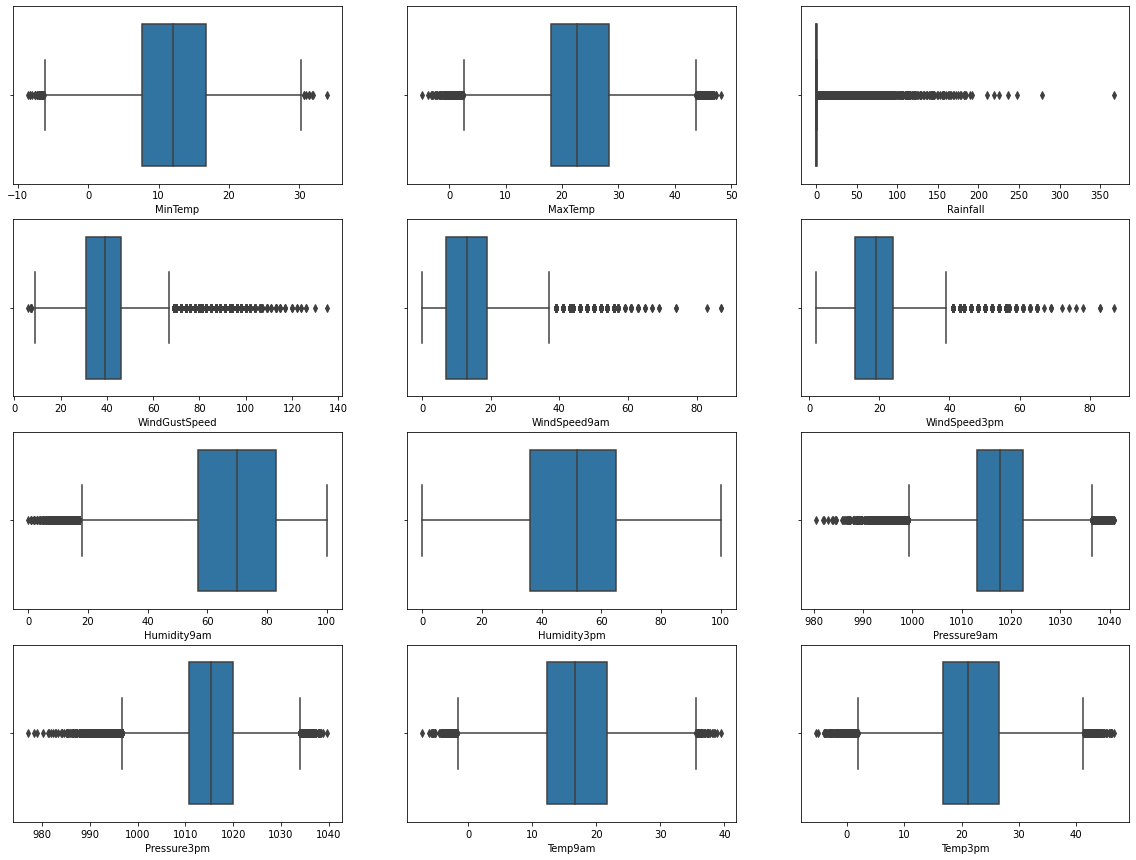

In [53]:
def boxplots(df, columns):
    fig, axes =plt.subplots(4,3, figsize=(20,15))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(columns):
            sns.boxplot(data = df, x = columns[i], ax=ax)
            i+=1

boxplots(train_df, columns)


* Podríamos eliminar outliers de distribuciones que se asemejen mas a una normal: 'MinTemp', 'MaxTemp',  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
* WinGustSpeed, WindSpeed9am y WindSpeed3pm como vimos antes no poseen muchas muestras, por lo tanto, no se puede decir mucho sobre los outliers.
* A simple vista podríamos pensar que 'Rainfall' presenta muchos outliers, puede que no se tengan muchas muestras que completen su distribución.

### Rainfall
Podríamos intuir que posee muchos outliers

In [54]:
train_df[train_df['RainToday'] == 'Yes']['Rainfall'].describe()

count    23839.000000
mean        10.170792
std         15.265539
min          1.100000
25%          2.400000
50%          5.200000
75%         11.600000
max        367.600000
Name: Rainfall, dtype: float64

In [55]:
train_df[train_df['RainToday'] == 'No']['Rainfall'].describe()

count    83769.000000
mean         0.074612
std          0.198384
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Rainfall, dtype: float64

* Notamos que cuando Rainfall>1mm entonces RainToday=Yes

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

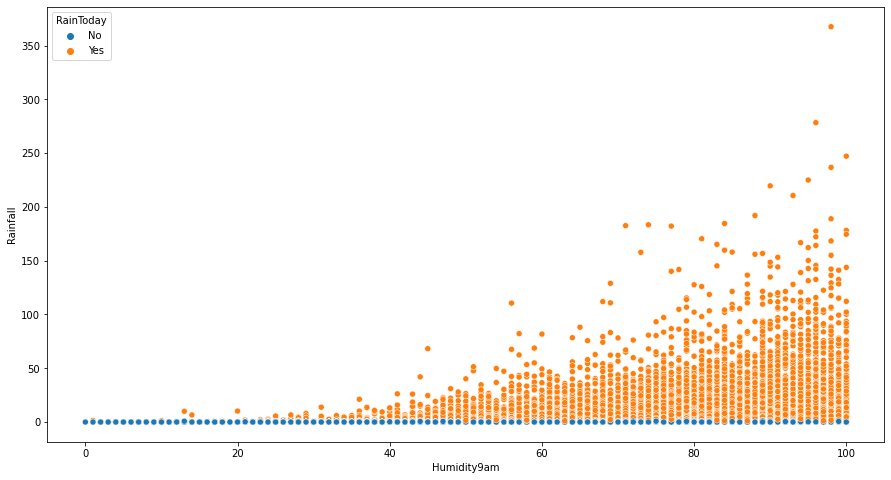

In [56]:
# scatter plot con la variable Humidity9am
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=train_df, x="Humidity9am", y="Rainfall", hue="RainToday", ax=axes)

* El boxplot no muestra la distribución real de Rainfall, esto debido a que RainToday está desbalanceado.
* No podemos simplemente eliminar los outliers, porque eliminaríamos muchos casos de 'RainToday'=Yes

### Funciones de preprocesamiento
Con base en lo definido en imputación y codificación de variables categóricas, construimos funciones con diferentes preprocesamientos.

In [58]:
'''
# 'WindGustDir y WindDir9am': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure3pm' y 'Pressure9am': imputación por kNN

# 'Date' year-month-day decomposition encoding
# 'Location': label encoding
# 'WindGustDir, WindDir9am, WindDir3pm': sin/cosine transformation
# 'RainToday, RainTomorrow': dummy encoding
'''
def pre_processing_1(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    # kNN imputer Pressure3pm y Pressure9am

    knn_df = XY_result_df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Temp3pm', 'Temp9am']]
    X_train_knn_imp = imputer.transform(knn_df)
    XY_result_df.loc[:, 'Pressure3pm'] = X_train_knn_imp[:, 7]
    XY_result_df.loc[:, 'Pressure9am'] = X_train_knn_imp[:, 8]

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df['WindGustDir_sin'] = XY_result_df['WindGustDir'].apply(sin_wind_dir)
    XY_result_df['WindGustDir_cos'] = XY_result_df['WindGustDir'].apply(cos_wind_dir)
    XY_result_df['WindDir3pm_sin'] = XY_result_df['WindDir3pm'].apply(sin_wind_dir)
    XY_result_df['WindDir3pm_cos'] = XY_result_df['WindDir3pm'].apply(cos_wind_dir)
    XY_result_df['WindDir9am_sin'] = XY_result_df['WindDir9am'].apply(sin_wind_dir)
    XY_result_df['WindDir9am_cos'] = XY_result_df['WindDir9am'].apply(cos_wind_dir)

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df


In [59]:
'''
# 'WindGustDir y WindDir9am': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure3pm y Pressure9am': imputación por mediana

# 'Date' year-month-day decomposition encoding
# 'Location': label encoding
# 'WindGustDir, WindDir9am, WindDir3pm': label encoding
# 'RainToday, RainTomorrow': dummy encoding
'''
def pre_processing_2(XY_df):
    XY_result_df = XY_df.copy(deep=True)

    # drop columns with >40% faltantes
    XY_result_df = XY_result_df.drop(columns=['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'])

    # dropna RainTomorrow, Rainfall y RainToday
    XY_result_df = XY_result_df.dropna(subset=['Rainfall', 'RainToday'])
    XY_result_df = XY_result_df.dropna(subset=['RainTomorrow'])

    # drop nulls < 5%
    XY_result_df = XY_result_df.dropna(subset=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Temp9am', 'Humidity9am', 'WindSpeed3pm', 'Temp3pm', 'WindDir3pm', 'Humidity3pm'])

    # WindGustDir y WindDir9am imputer por moda
    XY_result_df['WindGustDir'] = XY_result_df['WindGustDir'].fillna(moda_WindGustDir)
    XY_result_df['WindDir9am'] = XY_result_df['WindDir9am'].fillna(moda_WindDir9am)

    # WindGustSpeed imputer por median
    XY_result_df['WindGustSpeed'] = XY_result_df['WindGustSpeed'].fillna(median_WindGustSpeed)

    #Pressure3pm y Pressure9am imputación por mediana
    XY_result_df['Pressure9am_median'] = XY_result_df['Pressure9am'].fillna(median_Pressure9am)
    XY_result_df['Pressure3pm_median'] = XY_result_df['Pressure3pm'].fillna(median_Pressure3pm)

    # Date encoding
    XY_result_df.loc[:,'Date_day'] = XY_result_df['Date'].apply(lambda  x: x.day)
    XY_result_df.loc[:,'Date_month'] = XY_result_df['Date'].apply(lambda  x: x.month)
    XY_result_df.loc[:,'Date_year'] = XY_result_df['Date'].apply(lambda  x: x.year)

    # Location encoding
    XY_result_df.loc[:, 'Location_le'] = location_le.transform(XY_result_df['Location'])

    # wind direction encoding
    XY_result_df.loc[:, 'WindGustDir_le'] = windDir_le.transform(XY_result_df['WindGustDir'])
    XY_result_df.loc[:, 'WindDir3pm_le'] = windDir_le.transform(XY_result_df['WindDir3pm'])
    XY_result_df.loc[:, 'WindDir9am_le'] = windDir_le.transform(XY_result_df['WindDir9am'])

    # rainToday, rainTomorrow encoding
    XY_result_df.loc[:, 'RainToday_enc'] = XY_result_df['RainToday'].replace(('Yes', 'No'), (1, 0))
    XY_result_df.loc[:, 'RainTomorrow_enc'] = XY_result_df['RainTomorrow'].replace(('Yes', 'No'), (1, 0))

    return XY_result_df

#### Seleccion de features

In [60]:
numeric_c_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Pressure3pm_median', 'Pressure9am_median', 'WindDir9am_sin', 'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'WindGustDir_sin', 'WindGustDir_cos']

numeric_d_columns = ['Location_le', 'Date_day', 'Date_month', 'Date_year', 'RainToday_enc', 'WindGustDir_le', 'WindDir3pm_le', 'WindDir9am_le']

categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
target_column=['RainTomorrow_enc']

XY_train_df = train_df
X_train_df = train_df.drop(columns='RainTomorrow_enc')
y_train_df = train_df[target_column]

In [61]:
XY_train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure9am_median,Pressure3pm_median,Date_day,Date_month,Date_year,Location_le,WindGustDir_sin,WindGustDir_cos,WindDir3pm_sin,WindDir3pm_cos,WindDir9am_sin,WindDir9am_cos,WindGustDir_le,WindDir3pm_le,WindDir9am_le,RainToday_enc,RainTomorrow_enc
118978,2012-10-11,PerthAirport,14.6,29.8,0.0,NE,54.0,NE,ENE,33.0,22.0,18.0,13.0,1020.6,1015.9,22.2,27.9,No,No,1020.6,1015.9,11,10,2012,32,0.707107,7.071068e-01,0.382683,9.238795e-01,0.707107,7.071068e-01,4,1,4,0,0
116834,2015-04-23,PearceRAAF,9.8,26.4,0.0,E,50.0,ESE,ESE,22.0,26.0,64.0,38.0,1023.0,1021.4,17.7,25.7,No,No,1023.0,1021.4,23,4,2015,29,0.000000,1.000000e+00,-0.382683,9.238795e-01,-0.382683,9.238795e-01,0,2,2,0,0
12322,2009-09-13,Moree,8.5,28.4,0.0,N,46.0,NNE,N,28.0,19.0,41.0,17.0,1025.2,1019.9,19.8,27.6,No,No,1025.2,1019.9,13,9,2009,21,1.000000,6.123234e-17,1.000000,6.123234e-17,0.923880,3.826834e-01,3,3,5,0,0
38529,2014-09-21,WaggaWagga,1.8,20.4,0.0,E,26.0,E,S,19.0,7.0,64.0,37.0,1030.6,1026.9,13.2,19.9,No,No,1030.6,1026.9,21,9,2014,42,0.000000,1.000000e+00,-1.000000,-1.836970e-16,0.000000,1.000000e+00,0,8,0,0,0
62342,2012-04-05,Sale,12.3,22.9,0.2,E,28.0,N,E,2.0,20.0,91.0,68.0,1021.0,1018.5,16.5,22.2,No,No,1021.0,1018.5,5,4,2012,35,0.000000,1.000000e+00,0.000000,1.000000e+00,1.000000,6.123234e-17,0,0,3,0,0


#### Análisis de normalidad de variables continuas.

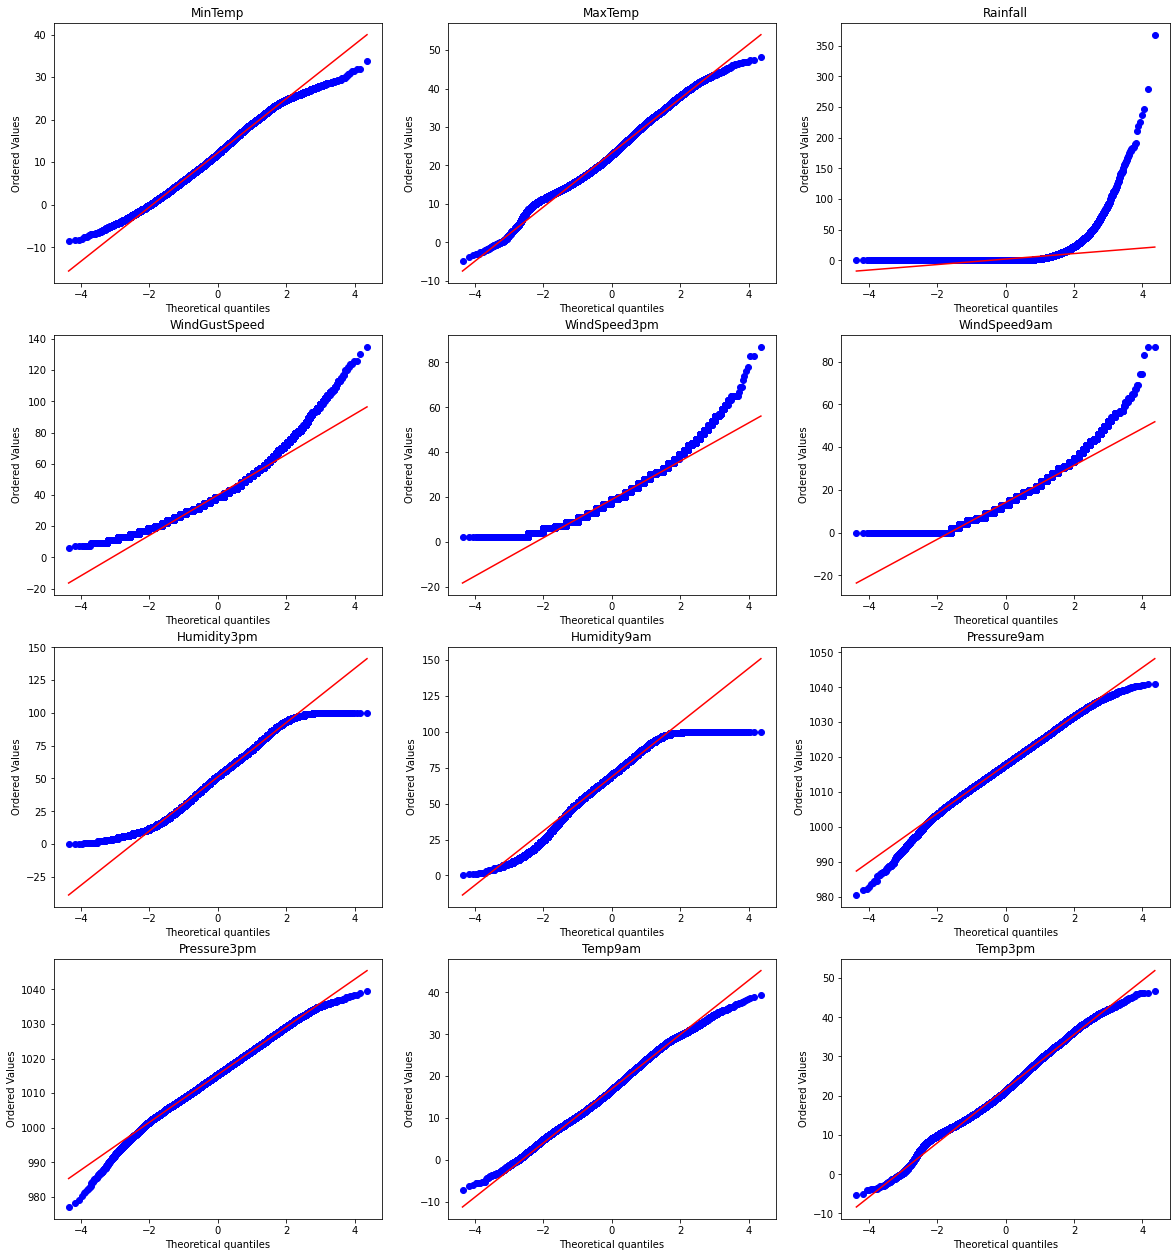

In [62]:
def qqPlots(df, numeric_columns):
    fig, axes =plt.subplots(4,3, figsize=(20,22))
    i = 0
    for ax in axes.reshape(-1):
        if i< len(numeric_columns):
            stats.probplot(df[numeric_columns[i]], dist="norm", plot=ax)
            ax.set_title(numeric_columns[i])
            i+=1

qqPlots(XY_train_df, numeric_c_columns)

    * Como vimos anteriormente MinTemp, MaxTemp, Pressure9am,  Pressure3pm, Temp9am y Temp3pm se asemejan más a una normal.
    por lo tanto podríamos analizar sus correlaciones con Pearson


#### Correlación pearson

In [63]:
normal_columns = ['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

<AxesSubplot:>

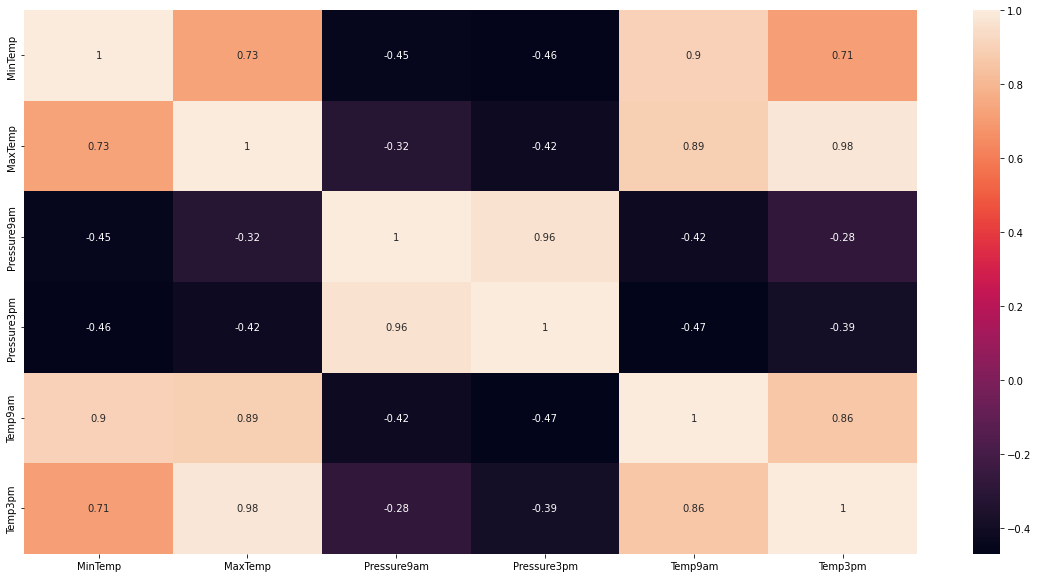

In [64]:
# correlacion pearson
correlation_matrix = XY_train_df[normal_columns].corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

* Podemos ver que 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'MaxTemp' están altamente correlacionadas (escogeremos solo la que mejor se relacione con la salida)
* Podemos ver que 'Pressure9am' y 'Pressure3pm' están altamente correlacionadas
* También se puede apreciar un grado de correlación entre las variables de temperatura y de presión.

#### Correlación spearman

<AxesSubplot:>

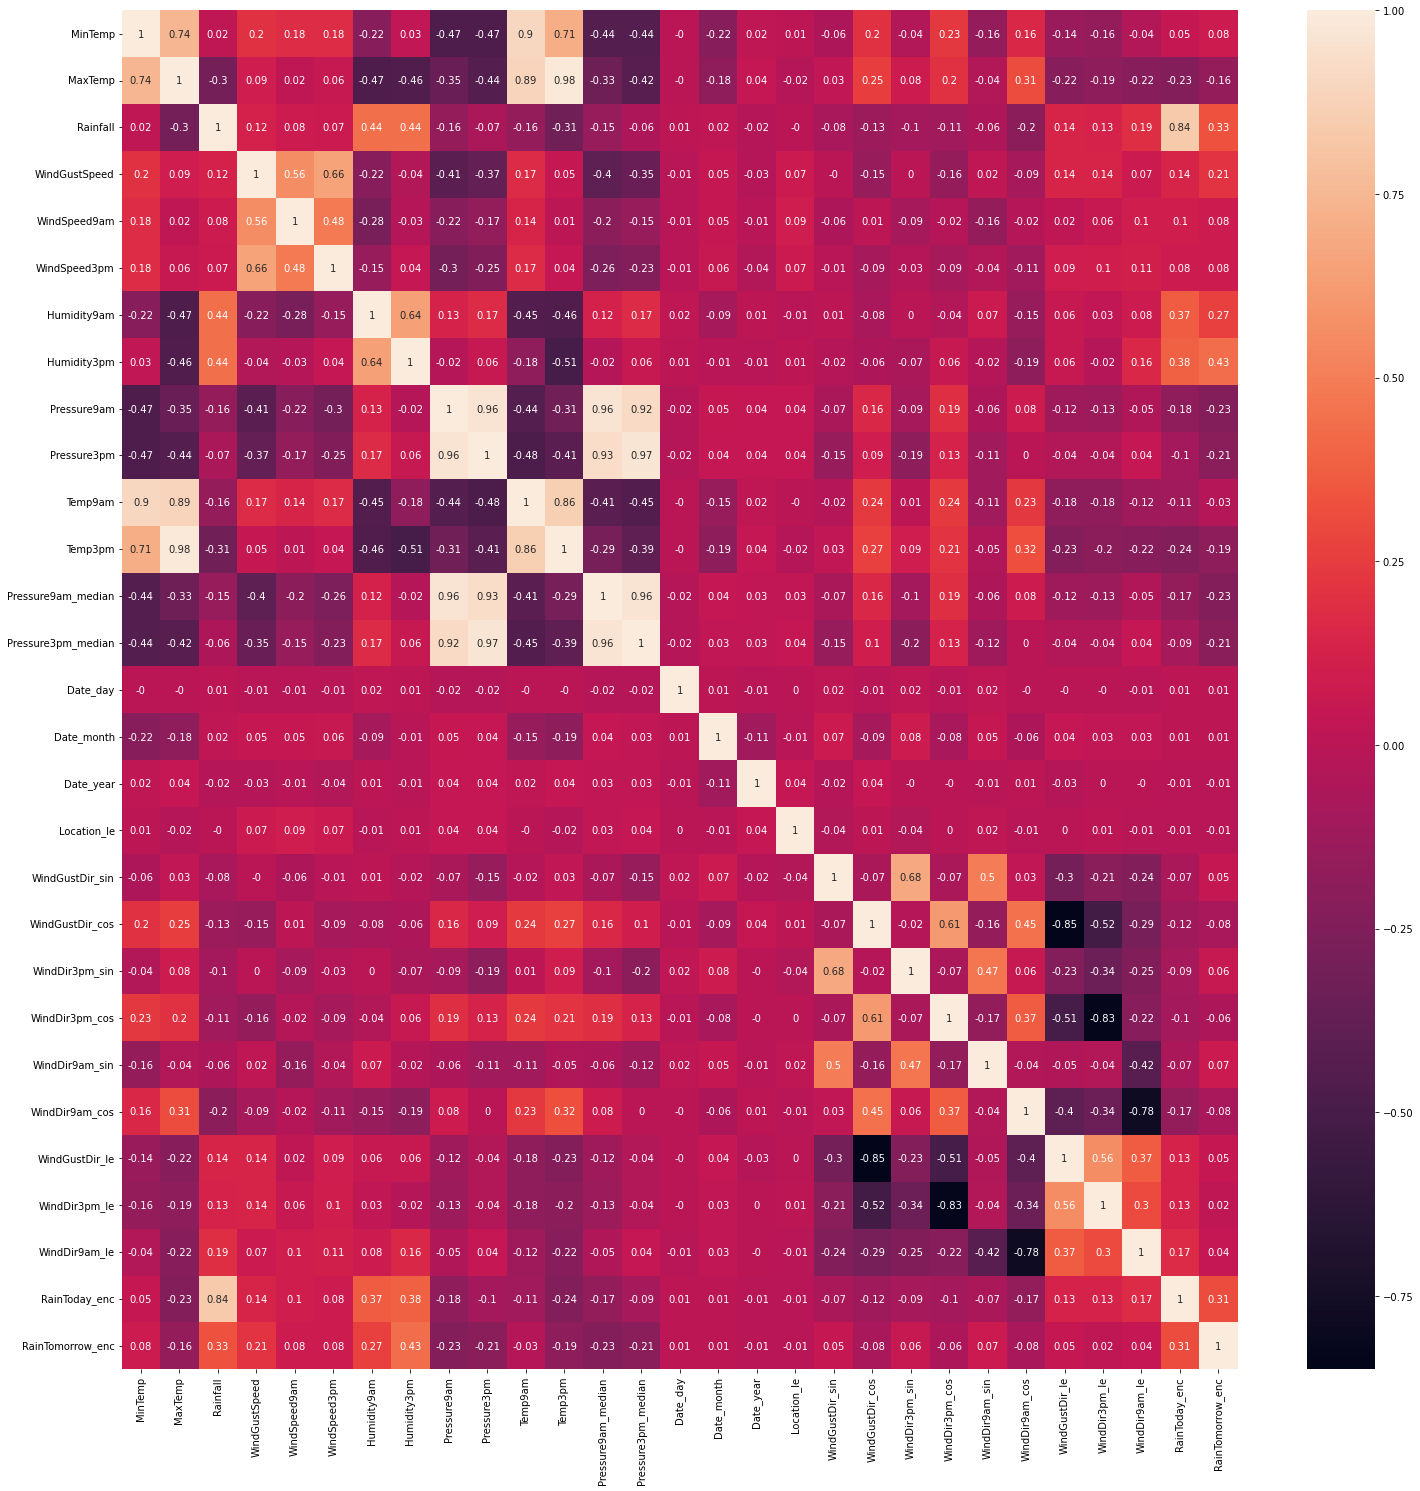

In [65]:
correlation_matrix = XY_train_df.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(25,25))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes)

* 'Rainfall' tiene alta correlación contra 'RainToday' como era de esperarse, debido a que RainToday se calcula a partir de 'Rainfall'
* 'Rainfall' tiene cierto grado de correlación con la variable de salida 'RainTomorrow', y también con 'Temp3pm', 'Humidity9am' y 'Humidity3pm'
* Las variables de 'WindGustSpeed', 'WindSpeed9am' y 'WindSpeed3pm' tienen mediana correlación entre si
* 'Humidity9am' y 'Humidity3pm' tienen mediana correlación entre ellas, y también contra 'MaxTemp', 'Temp3pm' y 'Temp9am'
* 'WindGustSpeed' tiene cierto grado de correlación contra 'Pressure9am' y 'Pressure3pm'
* Las variables de dirección de viento 'WindGustDir', 'WindDir3pm' y 'WindDir9am' tienen correlación entre si, convendrá tomar solo 1 de ellas.
* Las variables de mayor correlación contra la variable de salida son: 'Humidity3pm', 'Rainfall', 'RainToday', 'Humidity9am', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Temp3pm'

### Información Mutua¶

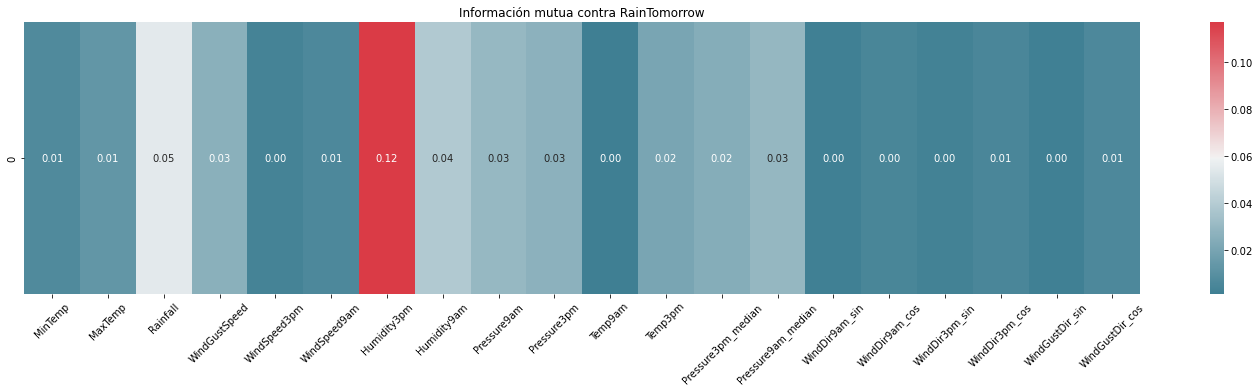

In [66]:
# informacion mutua
MI = mutual_info_classif(X_train_df[numeric_c_columns], y_train_df['RainTomorrow_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

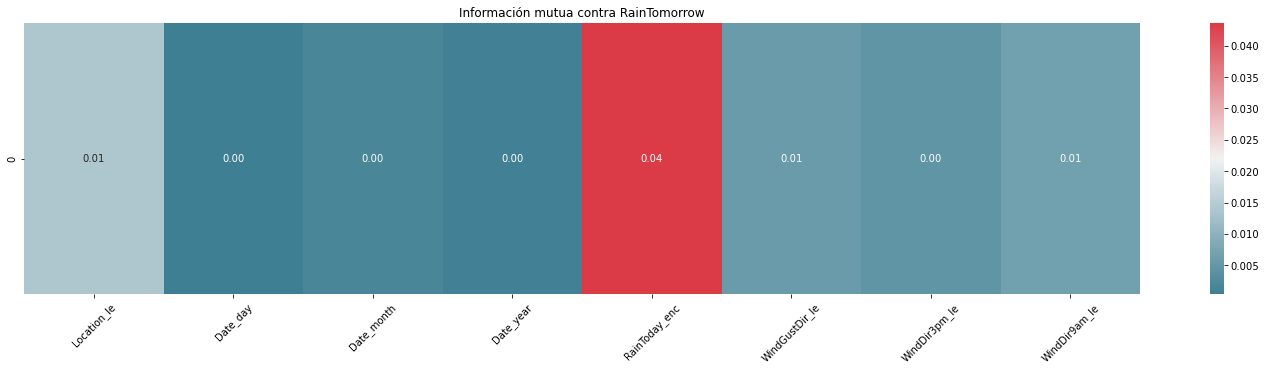

In [115]:
MI = mutual_info_classif(X_train_df[numeric_d_columns], y_train_df['RainTomorrow_enc'].to_numpy(), discrete_features=True)
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainTomorrow')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_d_columns)
ax.tick_params(axis='x', rotation=45)

* Encontramos que las variables 'Humidity3pm', 'Humidity9am', 'Rainfall', 'RainToday', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm' y 'Temp3pm' presentar mayor información mutua contra la variable de salida.

#### Información mutua contra 'RainToday'

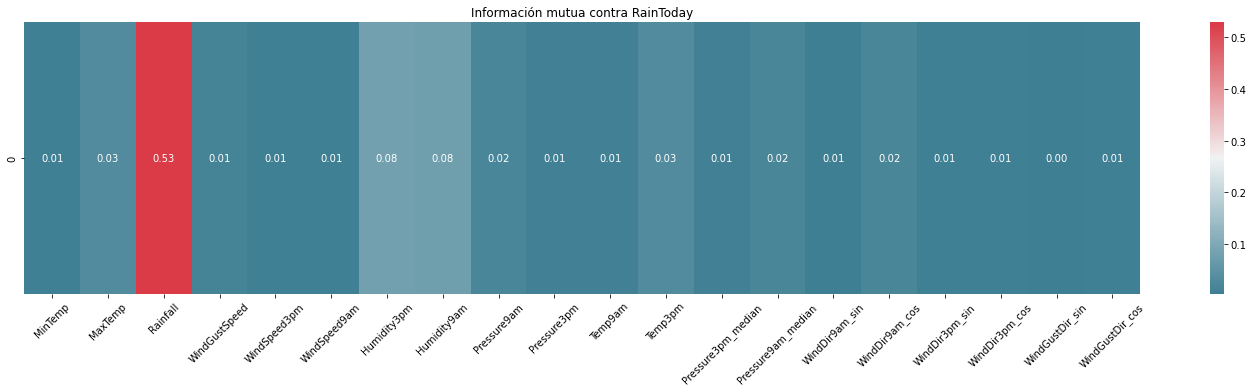

In [67]:
MI = mutual_info_classif(X_train_df[numeric_c_columns], X_train_df['RainToday_enc'].to_numpy())
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainToday')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_c_columns)
ax.tick_params(axis='x', rotation=45)

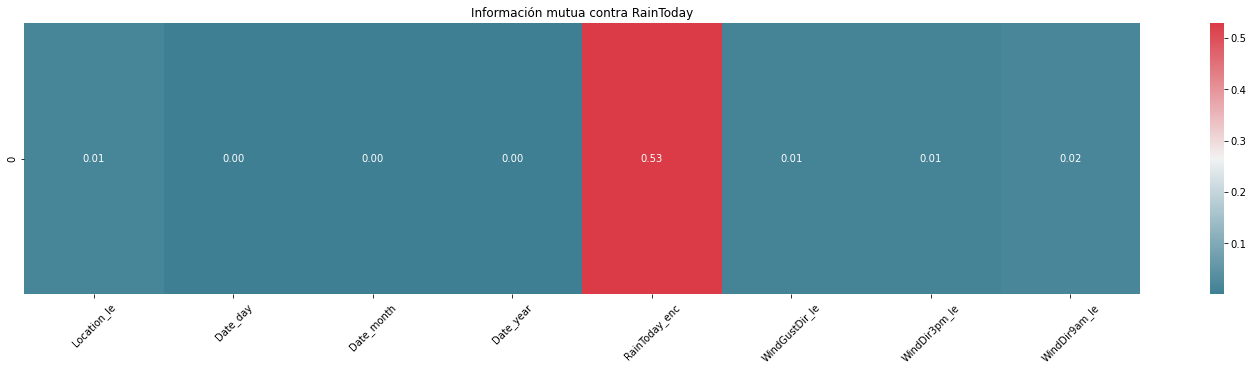

In [117]:
MI = mutual_info_classif(X_train_df[numeric_d_columns], X_train_df['RainToday_enc'].to_numpy(), discrete_features=True)
fig, ax = plt.subplots(1,1, figsize=(25,5))
ax.set_title('Información mutua contra RainToday')
sns.heatmap([MI],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(numeric_d_columns)
ax.tick_params(axis='x', rotation=45)

* Suponemos que los datos metereológicos del dia de hoy tienen una relacion con 'RainToday'.
* Como se observa 'Rainfall' y 'RainToday' tienen dependencia.

Del análisis anterior podemos decir que las mejores variables para predecir la variable de salida son:
'Humidity3pm', 'Rainfall', 'WindGustSpeed', 'Pressure9am' y 'Temp3pm'.

Probaremos 3 tipos de selección y comparamos resultados.

In [68]:
feature_selection_0 = ['WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

feature_selection_1 = ['Location_le', 'Date_month', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

feature_selection_2 = ['Location_le', 'Date_month', 'WindGustDir_le', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am_median', 'Rainfall']

X_train_s1 = X_train_df[feature_selection_0]
X_train_s1 = X_train_df[feature_selection_1]
X_train_s2 = X_train_df[feature_selection_2]
y_train = y_train_df

### 4. Entrenamiento de modelos

In [69]:
class LogisticRegressionNumpy(object):

    def __init__(self):
        self.w = None

    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """
    def fit(self, X=None, y=None, lr=0.01, epochs=100, b=16, gradient='SGD'):

        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'MINI':
            h, w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.w = w
            return h, w

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        pred = self.sigmoid(np.dot(X_expanded, self.w))
        return np.array([1 if i >= 0.5 else 0 for i in pred])

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def bce(self, X, y, theta):
        h = self.sigmoid(np.dot(X, theta))
        return (1 / len(y)) * ((np.dot((-y).T, np.log(h))) - (np.dot((1 - y).T, np.log(1 - h))))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss


    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)
        hist_cos = np.zeros((amt_epochs, 1))
        # iterate over the n_epochs
        for j in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Update the weights
                #W = W - (lr / batch_size) * np.dot(batch_X.T, (self.sigmoid(np.dot(batch_X, W)) - batch_y))

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)

            hist_cos[j] = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            #hist_cos[j] = self.bce(X_train, y_train, W)

        return hist_cos, W


class BaseMetric:
    def __init__(self, **kwargs):
        self.parameters = kwargs

    def __call__(self, *args, **kwargs):
        pass


class Metric(object):
    def __call__(self, target, prediction):
        return NotImplemented


class MSE(Metric):
    def __init__(self):
        Metric.__init__(self)

    def __call__(self, target, prediction):
        n = target.size
        return np.sum((target - prediction) ** 2) / n


class Accuracy(Metric):
    def __call__(self, target, prediction):
        return np.mean(target == prediction, axis=0)


class Precision(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FP)


class Recall(Metric):
    def __call__(self, target, prediction):
        inverse_truth = np.where(target == 0, 1, 0)
        inverse_predictions = np.where(prediction == 0, 1, 0)
        TP = np.sum(prediction * target)
        TN = np.sum(inverse_predictions * inverse_truth)
        FN = np.sum(target * inverse_predictions)
        FP = np.sum(prediction * inverse_truth)
        return TP / (TP + FN)

* Usamos StratifiedKFold para mantener la misma distribución de etiquetas durante K-fold cv

In [70]:
# Proporcion de las clases en K-Fold
skf = StratifiedKFold(n_splits=5)

# revisamos si mantenemos las etiquetas tanto en train y validation
for train_index, test_index in skf.split(X_train_s1.values, y_train.values):
    print(y_train.iloc[train_index, :].value_counts().to_numpy()/len(train_index))
    print(y_train.iloc[test_index, :].value_counts().to_numpy()/len(test_index))

[0.78046372 0.21953628]
[0.78045721 0.21954279]
[0.78046372 0.21953628]
[0.78045721 0.21954279]
[0.78046372 0.21953628]
[0.78045721 0.21954279]
[0.78045466 0.21954534]
[0.78049347 0.21950653]
[0.78046627 0.21953373]
[0.78044701 0.21955299]


In [71]:
# K-folds, metrica F1-score
def k_folds(X, y, lr, b, epochs):
    f1score_list = []
    log_reg = LogisticRegressionNumpy()
    for train_index, test_index in skf.split(X, y):
        #scale
        X_train_scaled = scaler.transform(X[train_index])
        X_val_scaled = scaler.transform(X[test_index])

        #fit
        log_reg.fit(X=X_train_scaled, y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = log_reg.predict(X_val_scaled)
        metrics_list = [Accuracy(), Precision(), Recall()]
        metrics = [metric(y[test_index].ravel(), y_val_predict.ravel()) for metric in metrics_list]
        F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
        f1score_list.append(F1)
    return np.mean(f1score_list)

## CASO 0:
pre_processing_1 + feature_selection_0

### Logistic Regression

In [76]:
X_train = X_train_df[feature_selection_0]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [77]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_0]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### ParameterGrid search

In [78]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value

{'lr': 0.05, 'epochs': 100, 'batch_size': 64}

In [79]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 64})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 64}


### Desempeño con test

In [80]:
log_reg = LogisticRegressionNumpy()

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8413016084797272
Precision: 0.7183359830418654
Recall: 0.45716694772344013
F1-score: 0.5587386644682605


Text(0.5, 1.0, 'Funcion de Costo')

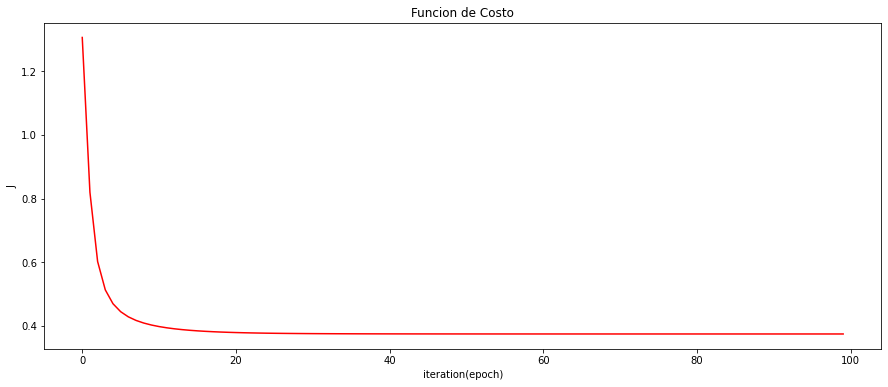

In [81]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [82]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5548431753239096 with hyper-parameters {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


### Desempeño con test

In [83]:
clf = LogisticRegression(C=10, penalty='l2', fit_intercept=True, solver='sag', max_iter=100)
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8412645467348603
Precision: 0.7180301826846703
Recall: 0.4573355817875211
F1-score: 0.5587720201916143


In [84]:
# result F1-score test
lreg_result_c0 = 0.5587720201916143
lreg_result_c0

0.5587720201916143

### SVM Classifier

### Desempeño con test

In [85]:
svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train_scaled, y_train.values.ravel())

X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = svm.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5395318735842952


In [86]:
# result F1-score  validation, test
svm_result_c0 = 0.5395318735842952
svm_result_c0

0.5395318735842952

### RandomForest Classifier

### Desempeño con test

In [87]:
X_train_scaled = scaler.transform(X_train.values)

forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5655850540806293


In [89]:
forest_result_c0 = 0.5655850540806293 #0.6001195457262403
forest_result_c0

0.5655850540806293

## CASO 1:
pre_processing_1 + feature_selection_1

### Logistic Regression

In [90]:
X_train = X_train_df[feature_selection_1]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [91]:
XY_test = pre_processing_1(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_1]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### ParameterGrid search

In [92]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value

{'lr': 0.05, 'epochs': 100, 'batch_size': 64}

In [135]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 32})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 32}


### Desempeño con test

In [136]:
log_reg = LogisticRegressionNumpy()

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8445246780317129
Precision: 0.7158789166224111
Recall: 0.46458728244011716
F1-score: 0.5634862577071794


Text(0.5, 1.0, 'Funcion de Costo')

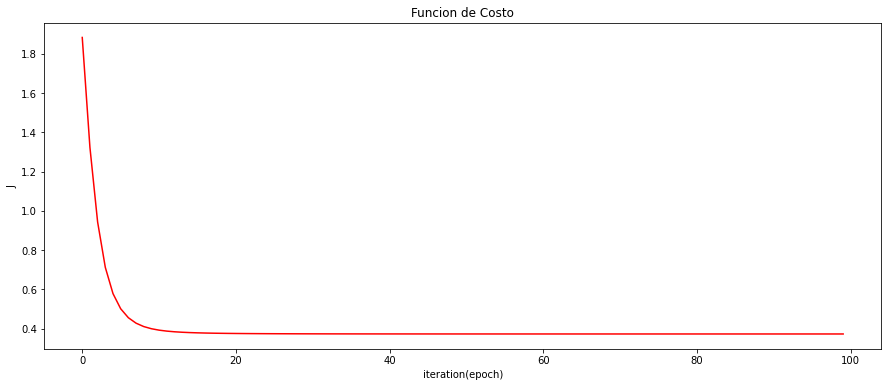

In [137]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [138]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5590761381185093 with hyper-parameters {'C': 10, 'penalty': 'l2', 'solver': 'sag'}


### Desempeño con test

In [98]:
clf = LogisticRegression(C=10, penalty='l2', fit_intercept=True, solver='sag', max_iter=100)
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8400044474093841
Precision: 0.7110704004187386
Recall: 0.4581787521079258
F1-score: 0.5572761768023793


In [99]:
# result F1-score test
lreg_result_c1 = 0.5572761768023793
lreg_result_c1

0.5572761768023793

### SVM Classifier

### Desempeño con test

In [102]:
svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = svm.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5400428265524626


In [103]:
# result F1-score  validation, test
svm_result_c1 = 0.5400428265524626
svm_result_c1

0.5400428265524626

### RandomForest Classifier

### Desempeño con test

In [104]:
forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5999999999999999


In [105]:
forest_result_c1 = 0.5993841263534321
forest_result_c1

0.5993841263534321

## CASO 2:
pre_processing_2 + feature_selection_2

### Logistic Regression

In [106]:
X_train = X_train_df[feature_selection_2]
# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)

In [107]:
XY_test = pre_processing_2(pd.concat([X_test, y_test], axis=1))

X_test_p1 = XY_test[feature_selection_2]
y_test_p1 = XY_test[['RainTomorrow_enc']]

X_test_scaled = scaler.transform(X_test_p1.values)

### ParameterGrid search

In [108]:
# seleccion de hiperparametros con clases propias
param_grid = {'lr': [0.01, 0.05], 'epochs': [100], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds(X_train.values, y_train.values, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmax(kfolds_list)]
best_params

C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\Freddy\AppData\Local\Temp/ipykernel_1192/2550792353.py:37: RuntimeWarning: invalid value

{'lr': 0.05, 'epochs': 100, 'batch_size': 32}

In [109]:
# best parameter
print("Best hyperparameters: ", {'lr': 0.05, 'epochs': 100, 'batch_size': 32})

Best hyperparameters:  {'lr': 0.05, 'epochs': 100, 'batch_size': 32}


### Desempeño con test

In [110]:
log_reg = LogisticRegressionNumpy()

# train
h, w = log_reg.fit(X=X_train_scaled, y=y_train.values.reshape(-1, 1), lr=0.05, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = log_reg.predict(X_test_scaled)

metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.840708620561856
Precision: 0.7147368421052631
Recall: 0.45801011804384484
F1-score: 0.5582733812949641


Text(0.5, 1.0, 'Funcion de Costo')

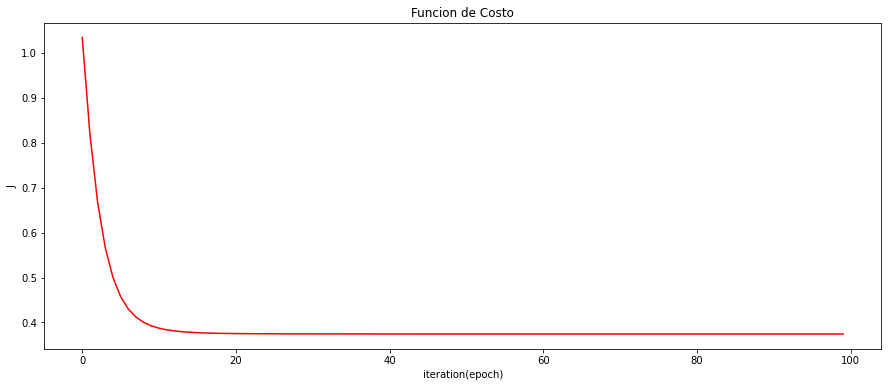

In [111]:
fig, axes = plt.subplots(1,1, figsize=(15,6))
axes.plot(range(len(h)), h, 'r')
axes.set_xlabel('iteration(epoch)')
axes.set_ylabel('J')
axes.set_title('Funcion de Costo')

### Logistic Regression con sklearn

In [112]:
# encontrar los mejores hiper parametros
grid={"C":[0.01,0.1,1, 10], "penalty":["l2"], 'solver':['liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='f1')

logreg_cv.fit(X_train_scaled, y_train.values.ravel())

print('Best F1-Score {} with hyper-parameters {}'.format(logreg_cv.best_score_, logreg_cv.best_params_))


Best F1-Score 0.5554505420245789 with hyper-parameters {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


### Desempeño con test

In [113]:
clf = LogisticRegression(C=1, penalty='l2', fit_intercept=True, solver='liblinear')
clf.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = clf.predict(X_test_scaled)


metrics_list = [Accuracy(), Precision(), Recall()]
metrics = [metric(y_test_p1.values.ravel(), y_test_predict.ravel()) for metric in metrics_list]
F1 = 2 * (metrics[1] * metrics[2]) / (metrics[1] + metrics[2])
print('Accuracy: {}'.format(metrics[0]))
print('Precision: {}'.format(metrics[1]))
print('Recall: {}'.format(metrics[2]))
print('F1-score: {}'.format(F1))

Accuracy: 0.8406715588169891
Precision: 0.714548802946593
Recall: 0.45801011804384484
F1-score: 0.5582160106874936


In [114]:
# result F1-score  validation, test
lreg_result_c2 = 0.5582160106874936
lreg_result_c2

0.5582160106874936

### SVM Classifier

### Desempeño con test

In [115]:
svm = SVC(C=0.1, kernel='linear')
svm.fit(X_train_scaled, y_train.values.ravel())

X_test_scaled = scaler.transform(X_test_p1.values)
y_test_predict = svm.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5387183629509962


In [116]:
# result F1-score  validation, test
svm_result_c2 = 0.5387183629509962
svm_result_c2

0.5387183629509962

### RandomForest Classifier

### Desempeño con test

In [117]:
forest = RandomForestClassifier(max_depth=None, n_estimators=300, max_features=None, oob_score=True)
forest.fit(X_train_scaled, y_train.values.ravel())

y_test_predict = forest.predict(X_test_scaled)
print('f1-score: ', f1_score(y_test_p1.values.ravel(), y_test_predict.ravel(), average='binary'))

f1-score:  0.5964183239339073


In [119]:
forest_result_c2 = 0.5964183239339073
forest_result_c2

0.5964183239339073

### 5. Evaluación de resultados y conclusiones

In [120]:
results = {'LogisticRegression': {}, 'SVM': {}, 'RandomForest': {}}
results['LogisticRegression']['CASO_1'] = lreg_result_c1
results['LogisticRegression']['CASO_2'] = lreg_result_c2
results['LogisticRegression']['CASO_0'] = lreg_result_c0
results['SVM']['CASO_1'] = svm_result_c1
results['SVM']['CASO_2'] = svm_result_c2
results['SVM']['CASO_0'] = svm_result_c0
results['RandomForest']['CASO_1'] = forest_result_c1
results['RandomForest']['CASO_2'] = forest_result_c2
results['RandomForest']['CASO_0'] = forest_result_c0

In [121]:
df_results = pd.DataFrame(results)

Text(0, 0.5, 'F1-score')

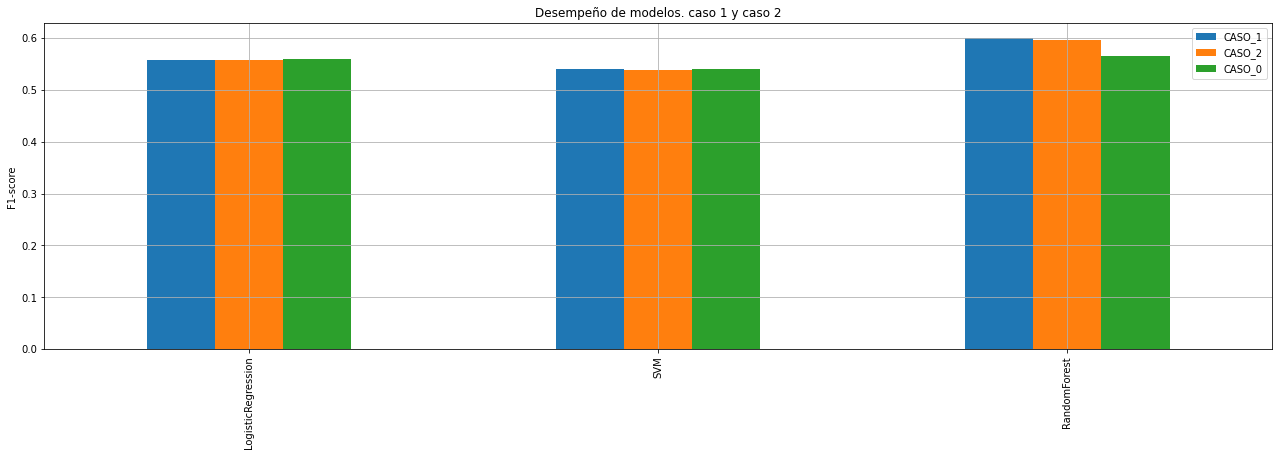

In [122]:
axes = df_results.T.plot.bar(title="Desempeño de modelos", figsize=(22,6))
axes.grid('both')
axes.set_ylabel('F1-score')

* Se obtienen desempeños cercanos en los 3 modelos
* El que posee el mejor desempeño fue RandomForest con el caso 1
Caso 1 utiliza como features:

In [123]:
['Location_le', 'Date_month', 'WindDir9am_sin', 'WindDir9am_cos', 'WindGustSpeed', 'Humidity3pm', 'Temp3pm', 'Pressure9am', 'Rainfall']

['Location_le',
 'Date_month',
 'WindDir9am_sin',
 'WindDir9am_cos',
 'WindGustSpeed',
 'Humidity3pm',
 'Temp3pm',
 'Pressure9am',
 'Rainfall']

Junto con el procesamiento 1:

In [124]:
# 'WindGustDir y WindDir9am': imputación por moda
# 'WindGustSpeed': imputación por mediana
# 'Pressure3pm' y 'Pressure9am': imputación por kNN

# 'Date' year-month-day decomposition encoding
# 'Location': label encoding
# 'WindGustDir, WindDir9am, WindDir3pm': sin/cosine transformation
# 'RainToday, RainTomorrow': dummy encoding

## Predecir el volúmen de precipitaciones (columna Rainfall del dia siguiente), en función al Rainfall del dia actual

### Obtener 'Rainfall_Tomorrow'

In [125]:
w_df = weather_aus_df.set_index('Date')[['Rainfall', 'RainToday', 'RainTomorrow']]

In [126]:
w_df = w_df.dropna()

In [127]:
rainfall_dict = {'Rainfall_today':[], 'Rainfall_tomorrow': []}

In [128]:
i=0
for index, row in w_df.iterrows():
    if (i+1) < len(w_df):
        if (index + pd.DateOffset(days=1)) == w_df.iloc[i+1, :].name:
            rainfall_dict['Rainfall_today'].append(row['Rainfall'])
            rainfall_dict['Rainfall_tomorrow'].append(w_df.iloc[i+1, :]['Rainfall'])
    i+=1


In [166]:
rainfall_df = pd.DataFrame(rainfall_dict)

#### Scatter plot

<AxesSubplot:xlabel='Rainfall_today', ylabel='Rainfall_tomorrow'>

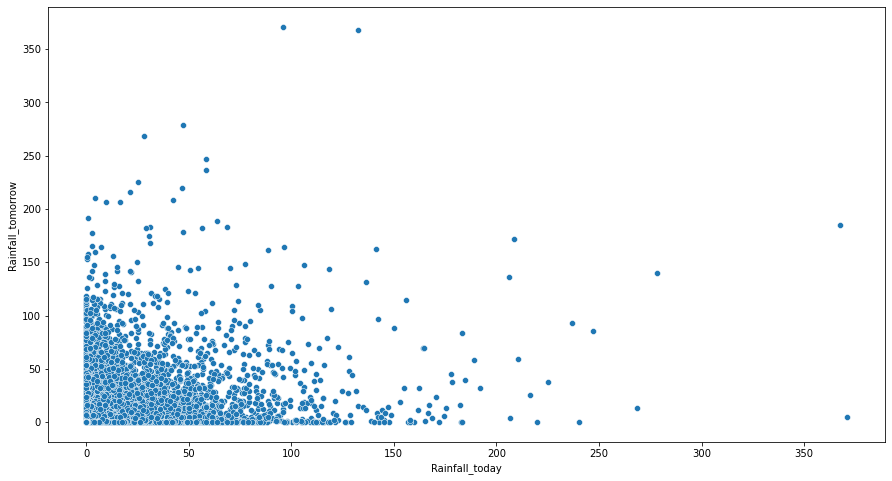

In [167]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(data=rainfall_df, x="Rainfall_today", y="Rainfall_tomorrow", ax=axes)


* A simple vista no podemos ver una relacion lineal entre el rainfall de hoy y del dia siguiente.

<AxesSubplot:xlabel='Rainfall_tomorrow'>

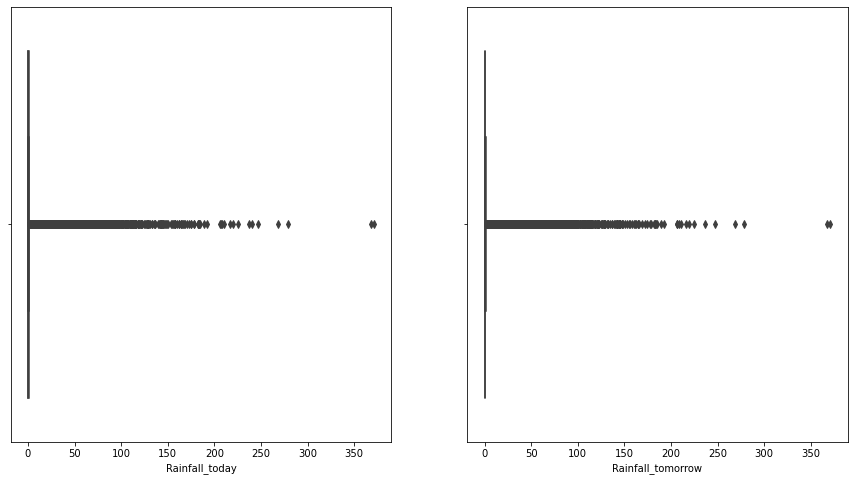

In [168]:
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(data = rainfall_df, x = 'Rainfall_today', ax=axes[0])
sns.boxplot(data = rainfall_df, x = 'Rainfall_tomorrow', ax=axes[1])

### Partición en Train y Test

In [169]:
train_ratio = 0.80
test_ratio = 0.20

X_train, X_test, y_train, y_test = train_test_split(rainfall_df.drop(columns=['Rainfall_tomorrow']), rainfall_df['Rainfall_tomorrow'], test_size=test_ratio)

print("Train: ", X_train.shape,y_train.shape)
print("Test:", X_test.shape,y_test.shape)

Train:  (111425, 1) (111425,)
Test: (27857, 1) (27857,)


### Standarization


In [170]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train.values)
X_test_scaled = x_scaler.transform(X_test.values)
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1,1))

### Modelado

In [171]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented

class LinearRegressionWithB(BaseModel):

    def fit(self, X, y):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W

    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)


class LinearRegressionWithGradient(BaseModel):
    """
        :param X: X_train
        :param y: y_train
        :param lr: learning rate
        :param epochs: number of epochs
        :param b: batch size for mini-batch
        :param gradient: type of gradient descent: 'SGD', 'MINI', 'BGD'
    """

    def fit(self, X, y, lr=0.01, epochs=100, b=16, gradient='SGD'):
        X_expanded = np.hstack((np.ones((len(X),1)),X))

        if gradient == 'BGD':
            w = self.gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'SGD':
            w = self.stochastic_gradient_descent(X_expanded, y, lr, epochs)
            self.model = w
            return w
        elif gradient == 'MINI':
            w = self.mini_batch_gradient_descent(X_expanded, y, lr, epochs, b)
            self.model = w
            return w


    def predict(self, X):
        X_expanded = np.hstack((np.ones((len(X),1)),X))
        return X_expanded.dot(self.model)

    def gradient_descent(self, X, y, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = y.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)  # mx1

        for i in range(amt_epochs):
            # Calculate the predictions for all samples
            prediction = np.matmul(X, W)  # nx1

            # Calculate the error for all samples
            error = y_train - prediction  # nx1

            # Calculate the gradient for all samples
            grad_sum = np.sum(error * X, axis=0)
            grad_mul = -2 / n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1 (it also works with reshape)

            # Update the parameters
            W = W - (lr * gradient)

        return W

    def stochastic_gradient_descent(self, X, y, lr=0.01, amt_epochs=100):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = y.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # Iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Iterate over each sample
            for j in range(n):
                # Calculate the prediction for each sample
                prediction = np.matmul(X_train[j].reshape(1, -1), W)  # 1x1
                # Calculate the error for each sample
                error = y_train[j] - prediction  # 1x1
                # Calculate the gradient for each sample
                grad_sum = error * X_train[j]  # 1xm
                grad_mul = -2 / n * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
                # Update all the weights
                W = W - (lr * gradient)  # mx1

        return W

    def mini_batch_gradient_descent(self, X, y, lr=0.01, amt_epochs=100, b=16):
        """
        shapes:
            X_train = nxm
            y_train = nx1
            W = mx1
        """

        n = X.shape[0]
        m = X.shape[1]

        # initialize random weights
        W = np.random.randn(m).reshape(m, 1)

        # iterate over the n_epochs
        for i in range(amt_epochs):

            # Shuffle all the samples
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X_train) / b)

            # Iterate over the batches
            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]  # batch_size*m
                batch_y = y_train[i: end]  # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = np.matmul(batch_X, W)  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error * batch_X, axis=0)  # 1xm
                grad_mul = -2 / batch_size * grad_sum  # 1xm
                gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

                # Update the weights
                W = W - (lr * gradient)

        return W

### Linear Regression (solución cerrada)

In [172]:
mse = MSE()
lineal_reg = LinearRegressionWithB()

# train
lineal_reg.fit(X_train_scaled, y_train_scaled)

# test
y_test_predict = lineal_reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {}'. format(lineal_reg.model.ravel()))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: [-1.03974988e-16  3.11146171e-01]
MSE: 1.0074770880469954 
R2-score: 0.08939270237855612


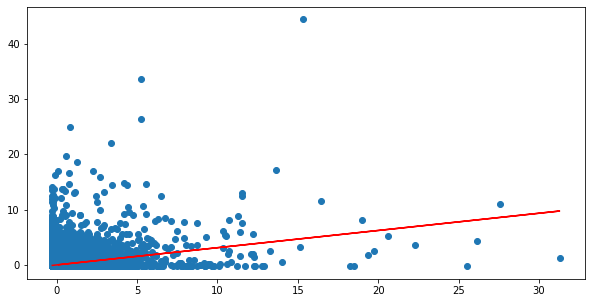

In [173]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
axes.scatter(X_test_scaled, y_test_scaled )
axes.plot(X_test_scaled, y_test_predict, 'r')

### Linear Regression con Mini-Batch Gradient Descent

In [174]:
def k_folds_lineal_regression(X, y, lr, b, epochs):
    mse_list = []
    linealreg = LinearRegressionWithGradient()
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(X, y):
        #scale
        # input already scaled

        #fit
        linealreg.fit(X=X[train_index], y=y[train_index], lr=lr, epochs=epochs, b=b, gradient='MINI')

        # metric
        y_val_predict = linealreg.predict(X[test_index])
        mse = MSE()
        mse_list.append(mse(y[test_index].ravel(), y_val_predict.ravel()))

    return np.mean(mse_list)

In [175]:
# seleccion de hiperparametros
param_grid = {'lr': [0.01, 0.05, 0.1], 'epochs': [100, 200], 'batch_size': [32, 64]}
grid = ParameterGrid(param_grid)

kfolds_list = np.zeros(len(list(grid)))
for i, params in enumerate(grid):
    kfolds_list[i] = k_folds_lineal_regression(X_train_scaled, y_train_scaled, params['lr'], params['batch_size'], params['epochs'])

best_params = grid[np.argmin(kfolds_list)]
best_params

{'lr': 0.01, 'epochs': 200, 'batch_size': 32}

In [176]:
print({'lr': 0.01, 'epochs': 200, 'batch_size': 32})

{'lr': 0.01, 'epochs': 200, 'batch_size': 32}


In [177]:
mse = MSE()
lineal_reg = LinearRegressionWithGradient()

# train
lineal_reg.fit(X_train_scaled, y_train_scaled, lr=0.1, epochs=100, b=32, gradient='MINI')

# test
y_test_predict = lineal_reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {}'. format(lineal_reg.model.ravel()))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: [-0.00249349  0.30521415]
MSE: 1.0076978934596144 
R2-score: 0.08919312759668685


### Linear Regression con sklearn

In [178]:
reg = LinearRegression()

# train
reg.fit(X_train_scaled, y_train_scaled)

# test
y_test_predict = reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)

print('W: {} {}'. format(reg.intercept_, reg.coef_))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))


W: [3.79613394e-17] [[0.31114617]]
MSE: 1.0074770880469957 
R2-score: 0.08939270237855568


### Regresión polinómica
se intenta con un polinomio de grado 15

In [179]:
poly = PolynomialFeatures(15, include_bias=False)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)


In [180]:
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train_poly)
X_test_scaled = x_scaler.transform(X_test_poly)

In [189]:
reg = LinearRegression()

reg.fit(X_train_scaled, y_train_scaled)

y_test_predict = reg.predict(X_test_scaled)
lr_mse = mse(y_test_scaled, y_test_predict)
print('W: {} {}'. format(reg.intercept_, reg.coef_))
print('MSE: {} '.format(lr_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: [2.016749e-07] [[ 1.44532223e+00 -2.23538192e+01  3.69737988e+02 -3.41961036e+03
   5.70590451e+03  2.07827533e+05 -2.40684441e+06  1.37522854e+07
  -4.90065649e+07  1.16210397e+08 -1.86528293e+08  2.00294520e+08
  -1.37737686e+08  5.47871859e+07 -9.57546287e+06]]
MSE: 1.1657671533923655 
R2-score: -0.05367763674338488


In [191]:
lr_mse = 1.1657671533923655

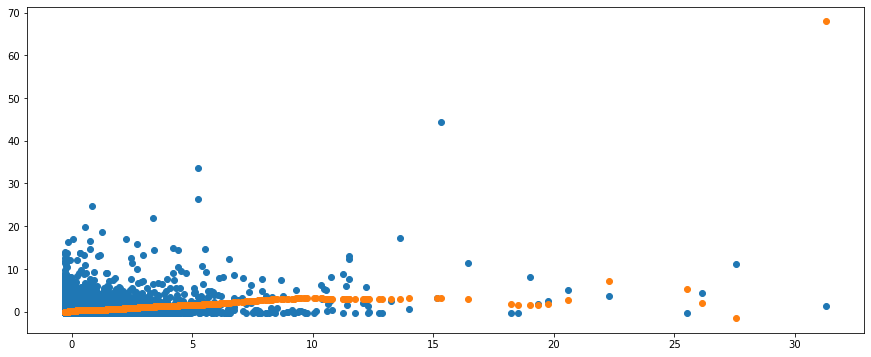

In [190]:
fig,axes = plt.subplots(1,1,figsize=(15,6))
axes.scatter(X_test_scaled[:,0], y_test_scaled )
axes.scatter(X_test_scaled[:,0], y_test_predict)

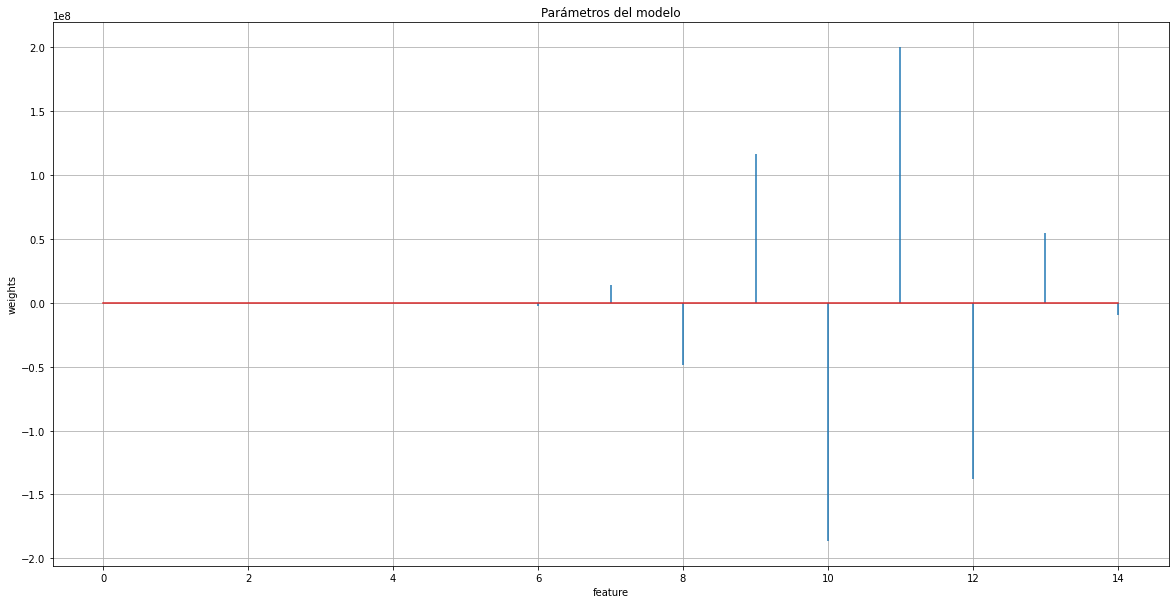

In [192]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(np.arange(reg.coef_.shape[1]), reg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

### Ridge

In [193]:

ridge_reg = RidgeCV(
    alphas          = np.logspace(-10, 2, 200),
    fit_intercept   = True,
    store_cv_values = True
)

_ = ridge_reg.fit(X = X_train_scaled, y = y_train_scaled)

In [194]:
# Evolución de los parámetros en función de alpha
alphas = ridge_reg.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_scaled, y_train_scaled)
    coefs.append(modelo_temp.coef_.flatten())


C:\ProgramData\Anaconda3\envs\add\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.24704e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\envs\add\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.13183e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


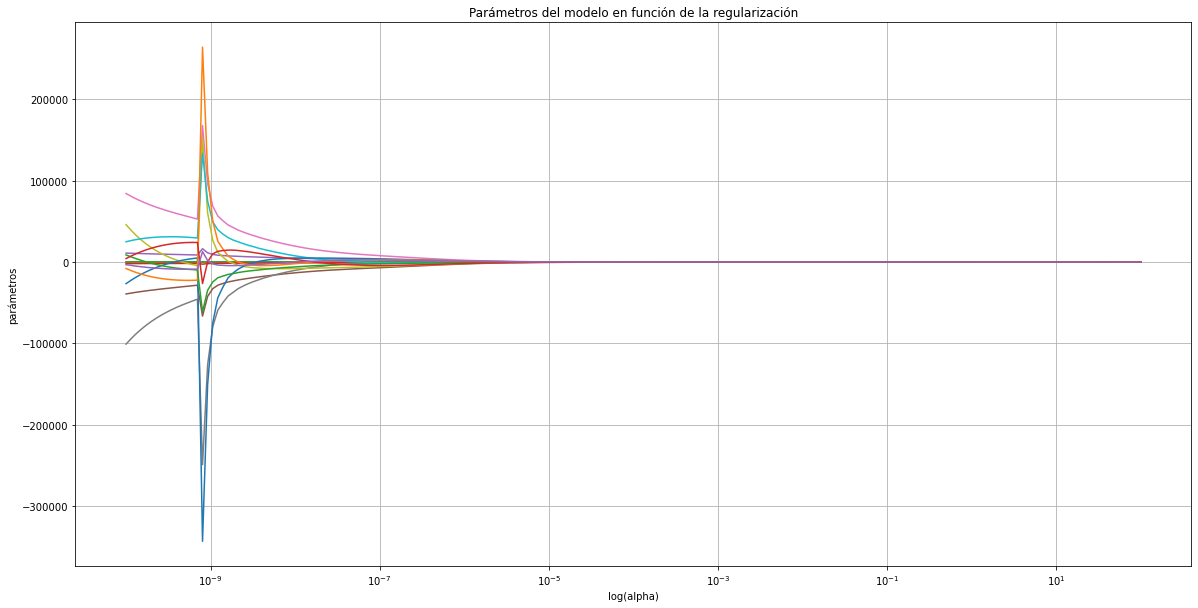

In [195]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
ax.grid('both')

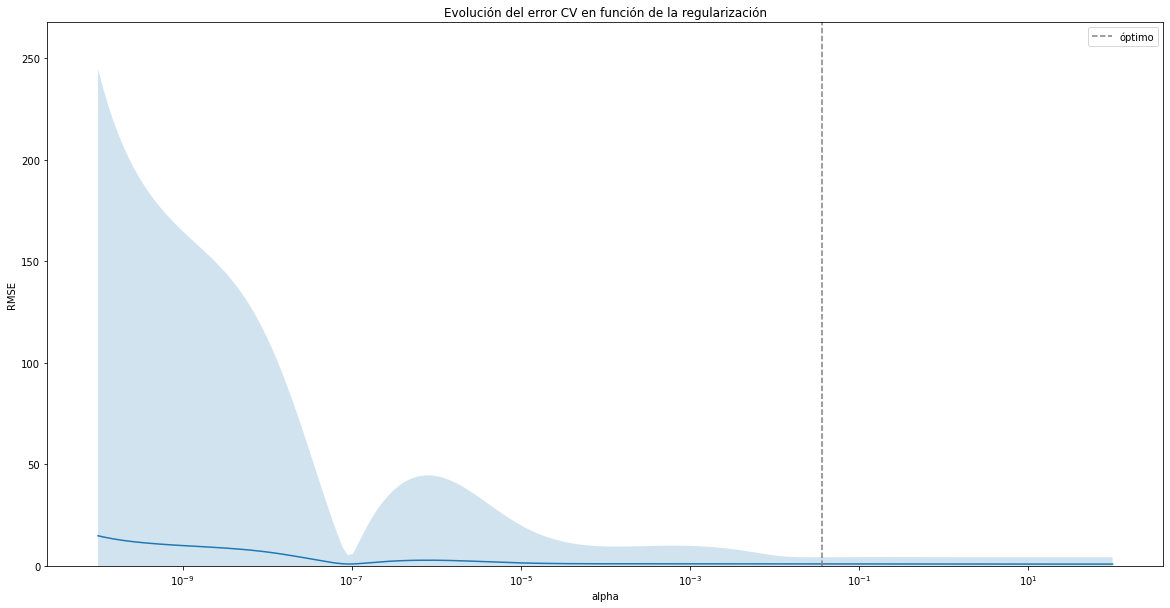

In [196]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)

mse_cv = ridge_reg.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = ridge_reg.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = ridge_reg.alphas[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar (fill area)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ridge_reg.alphas, rmse_cv)
ax.fill_between(
    ridge_reg.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [198]:
print(f"Mejor valor de alpha encontrado: {ridge_reg.alpha_}")

Mejor valor de alpha encontrado: 0.03654383070957247


In [199]:
best_alpha_ridge = 0.03654383070957247

In [200]:
ridgereg = Ridge(alpha=best_alpha_ridge, fit_intercept=False)
ridgereg.fit(X_train_scaled, y_train_scaled)

y_test_predict = ridgereg.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test_scaled, y_test_predict)

print('W: {} {}'. format(ridgereg.intercept_, ridgereg.coef_))
print('MSE: {} '.format(mean_squared_error(y_test_scaled, y_test_predict)))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: 0.0 [[  0.60696513  -1.76630799   8.46508837 -22.65428173  20.84178708
    9.19821328  -8.8179792  -12.5447779   -6.02128467   2.54435893
    8.03950683   8.79447022   5.20169473  -1.51840761 -10.04715491]]
MSE: 1.0082986977545767 
R2-score: 0.08865009115255751


In [201]:
ridge_mse = 1.0082986977545767

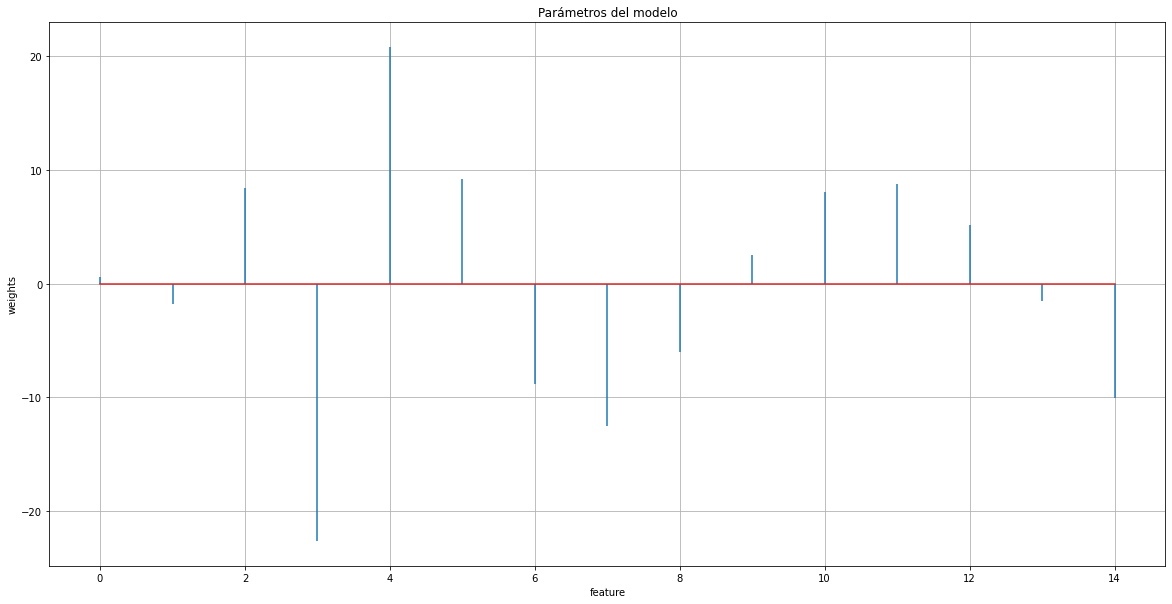

In [202]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(np.arange(ridgereg.coef_.shape[1]), ridgereg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

### Usando LASSO

In [203]:
lasso_reg = LassoCV(
    alphas          = np.logspace(-10, 3, 200),
    cv              = 5
)

_ = lasso_reg.fit(X = X_train_scaled, y = y_train_scaled)

In [205]:
# Evolución de los parámetros en función de alpha

alphas = lasso_reg.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train_scaled, y_train_scaled)
    coefs.append(modelo_temp.coef_.flatten())

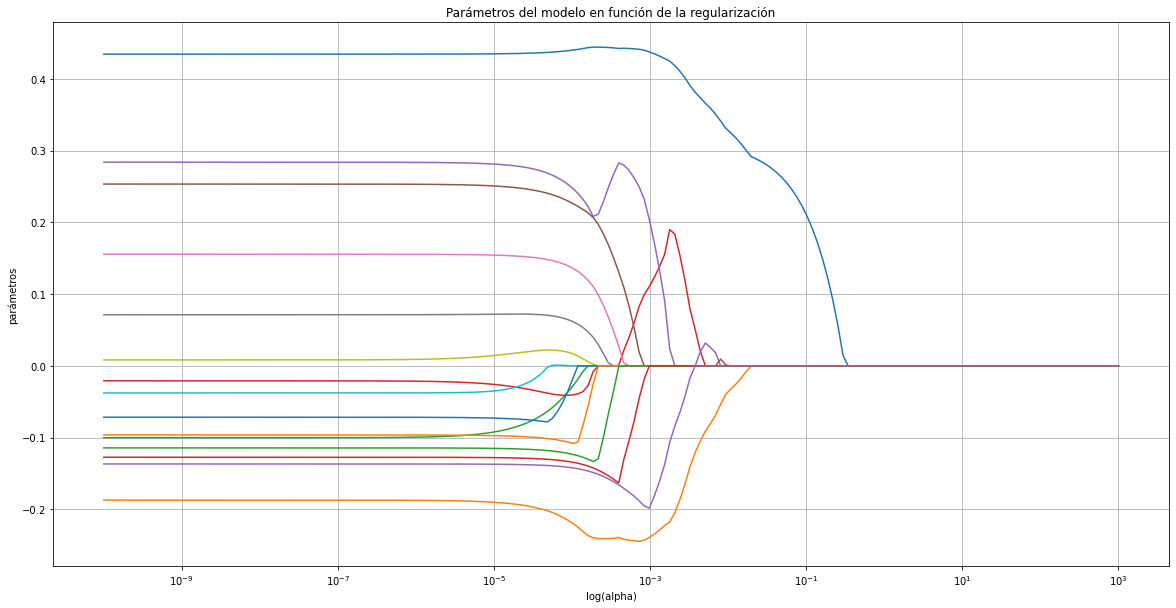

In [206]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
ax.grid('both')

In [207]:
print(f"Mejor valor de alpha encontrado: {lasso_reg.alpha_}")

Mejor valor de alpha encontrado: 7.934096665797492e-06


In [209]:
best_alpha_lasso = 7.934096665797492e-06

In [210]:
lassoreg = Lasso(alpha=best_alpha_lasso, fit_intercept=False)
lassoreg.fit(X_train_scaled, y_train_scaled)

y_test_predict = lassoreg.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test_scaled, y_test_predict)
print('W: {} {}'. format(lassoreg.intercept_, lassoreg.coef_))
print('MSE: {} '.format(lasso_mse))
print('R2-score: {}'.format(r2_score(y_test_scaled, y_test_predict)))

W: 0.0 [ 0.4345595  -0.18940559 -0.09381342 -0.02488245  0.28166284  0.25117141
  0.15453207  0.07186205  0.01335036 -0.03587072 -0.07254338 -0.09700335
 -0.11483469 -0.12773333 -0.13698133]
MSE: 1.0125722379612634 
R2-score: 0.08478745552038502


In [212]:
lasso_mse = 1.0125722379612634

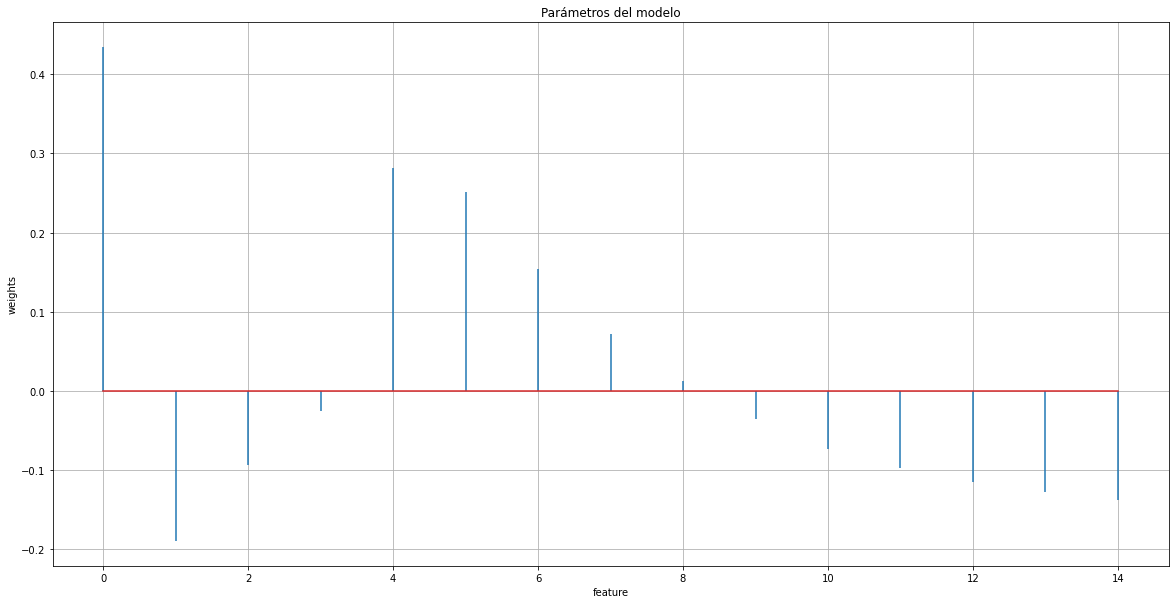

In [213]:
fig, axes = plt.subplots(figsize=(20, 10))
axes.stem(np.arange(lassoreg.coef_.shape[0]), lassoreg.coef_.ravel(), markerfmt=' ')
axes.set_xlabel('feature')
axes.set_ylabel('weights')
axes.set_title('Parámetros del modelo')
axes.grid('both')

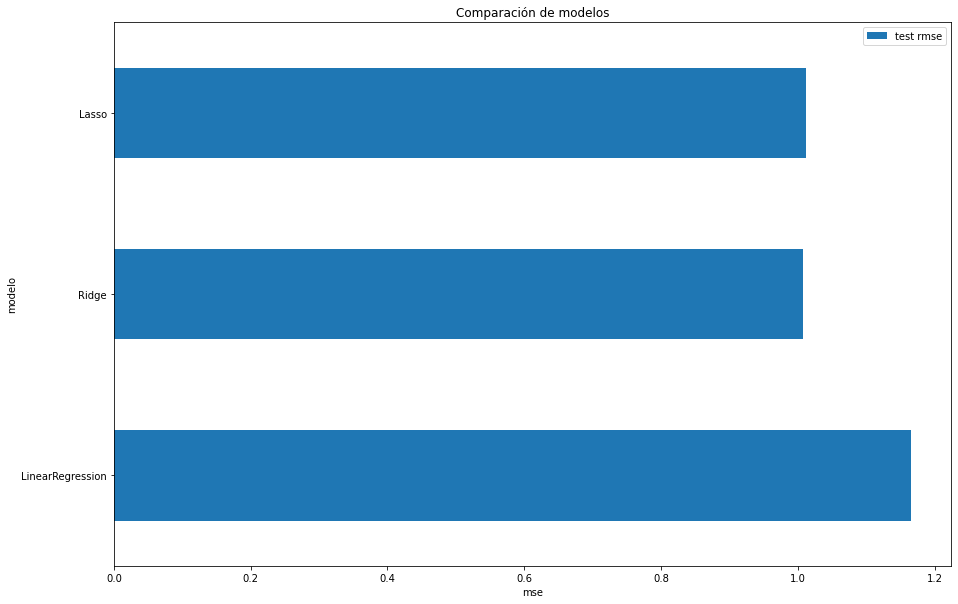

In [214]:
df_comparacion = pd.DataFrame({
    'modelo': ['LinearRegression', 'Ridge', 'Lasso', ],
    'test rmse': [lr_mse, ridge_mse, lasso_mse]
})

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

* Comparando los resultados, se nota que LinearRegression tiene mayor error cuadrático medio.
* No se obtienen buenos resultados debido a que la relacion entre las variables no es lineal, usando una regresión polinomica tampoco se puede explicar la relacion.
* Al aplicar las regulaciones Ridge/Lasso no hay ninguna mejora significativa, por lo mismo que la relacion no se puede explicar con una regresión polinómica
* Se recomienda usar modelos no lineales o incluir más variables independientes.